In [2]:
import sys
import time
%pylab inline
%load_ext autoreload
%autoreload 2
sys.path.append('../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
unet = O.CustomUNet(img_height=512, img_width=512, batch_size=32)

In [4]:
unet.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 512, 512, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 512, 512, 64) 18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 256, 256, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [5]:
train_image_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/train/images"
)
train_mask_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/train/masks"
)
val_image_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/val/images"
)
val_mask_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/val/masks"
)
test_image_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/test/images"
)
test_mask_folder = (
    "/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/test/masks"
)
model_save_path = '/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/model1'
prediction_save_path = '/hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/preds'

In [6]:
history = unet.compile_and_train(
    train_image_folder,
    train_mask_folder,
    val_image_folder,
    val_mask_folder,
    epochs=20
)

  0%|          | 0/250 [00:00<?, ?it/s]

Training:   0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

Restoring model weights from the end of the best epoch.
Epoch 00018: early stopping


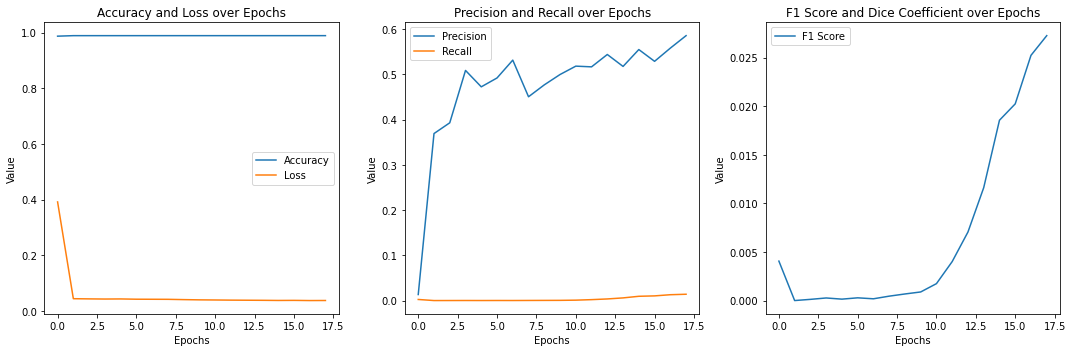

In [7]:
unet.plot_training_history()

In [8]:
unet.model.save(model_save_path, save_format='tf')

Generating predictions...
image_folder:  /hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/test/images
mask_folder:  /hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/test/masks


Visualizing Predictions:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

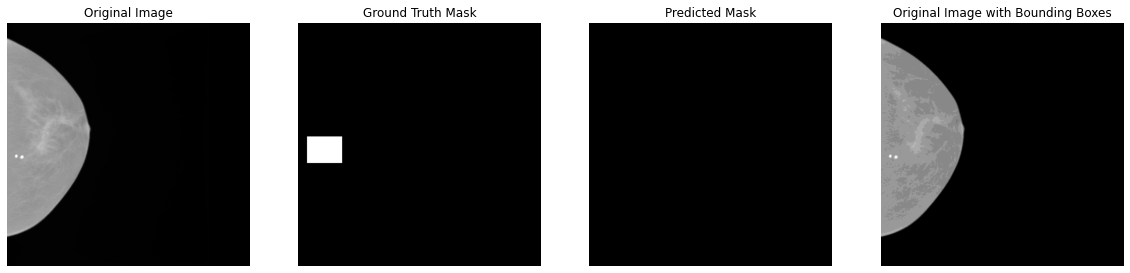

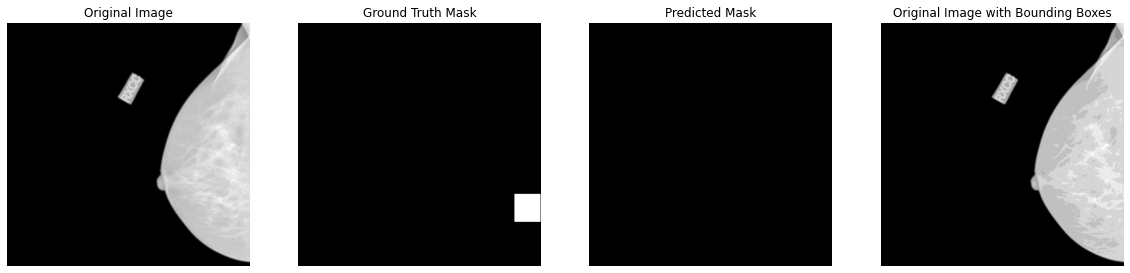

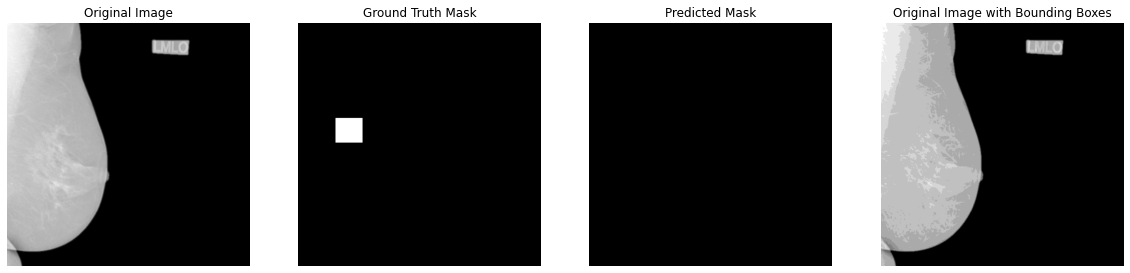

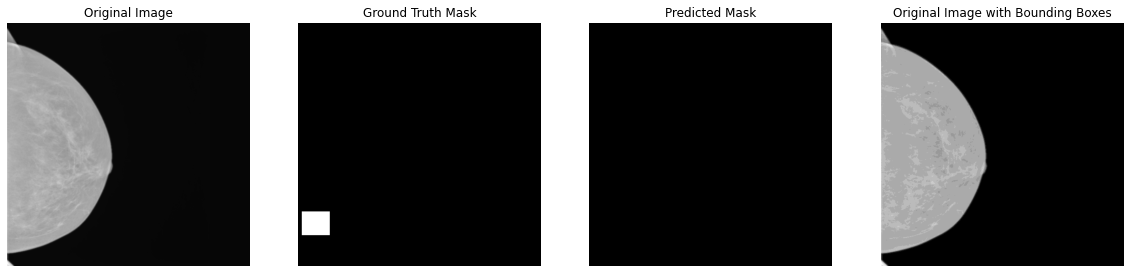

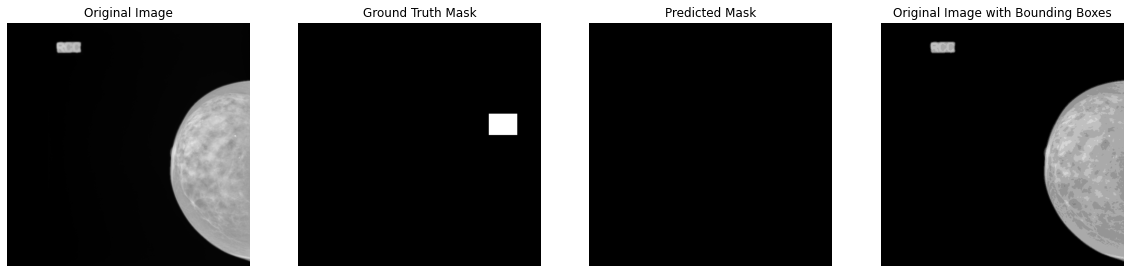

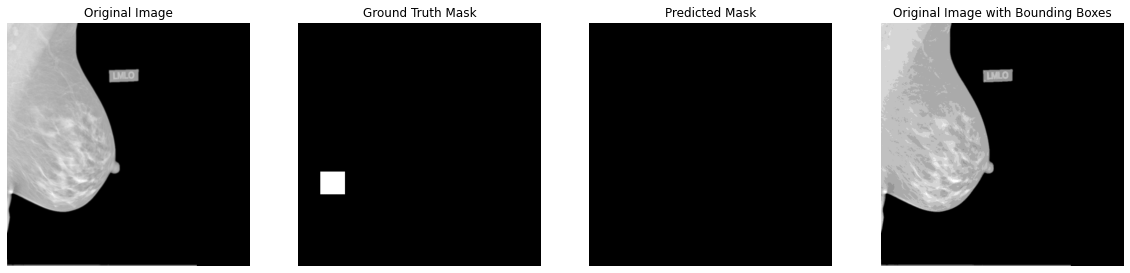

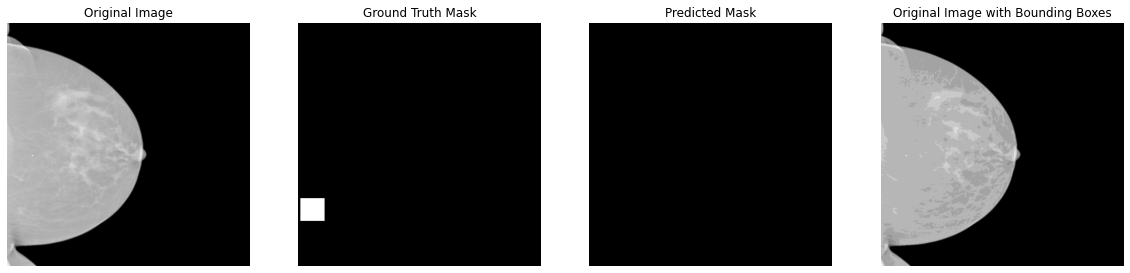

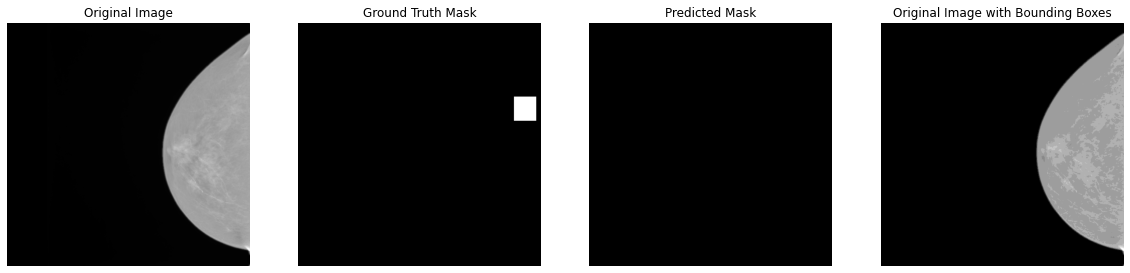

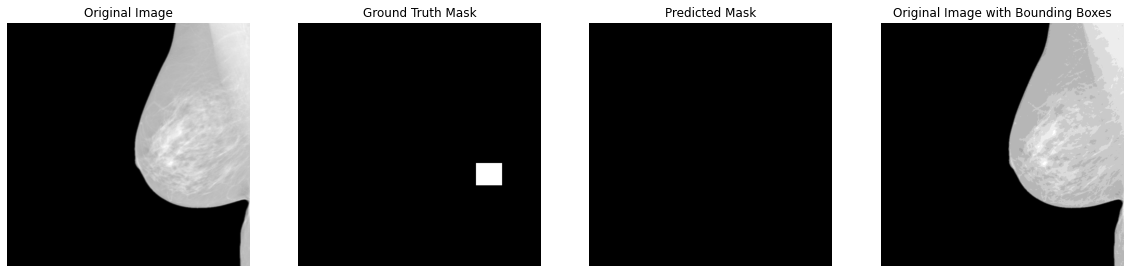

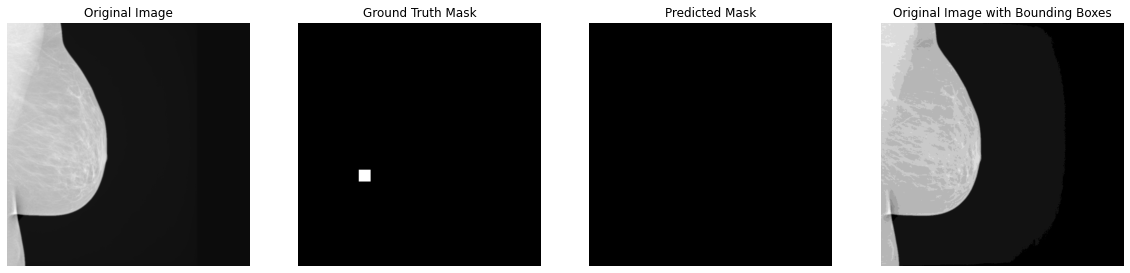

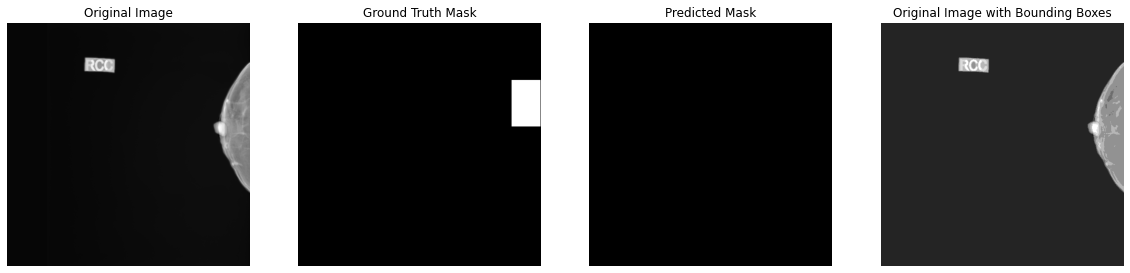

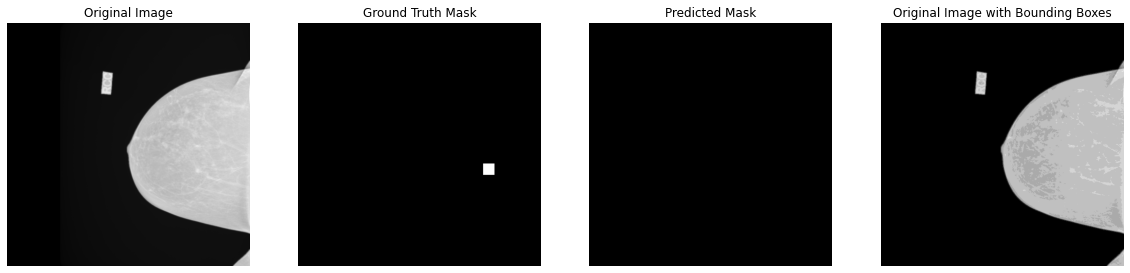

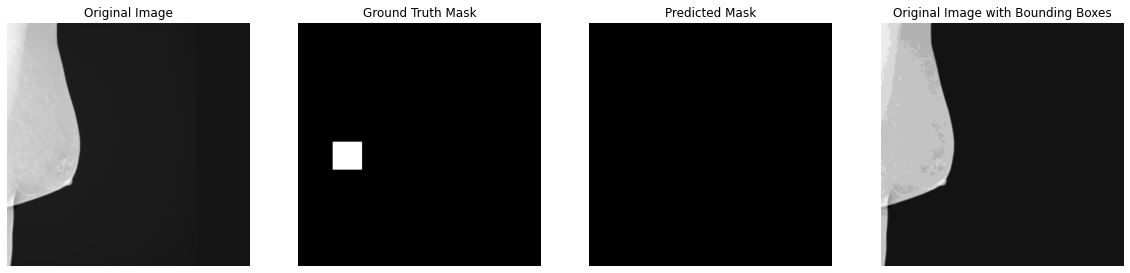

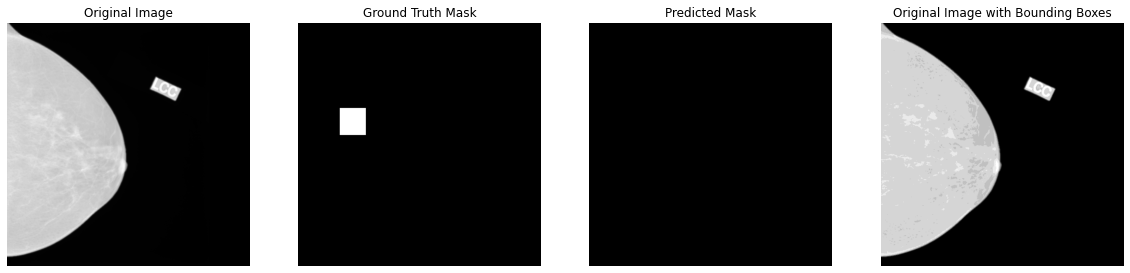

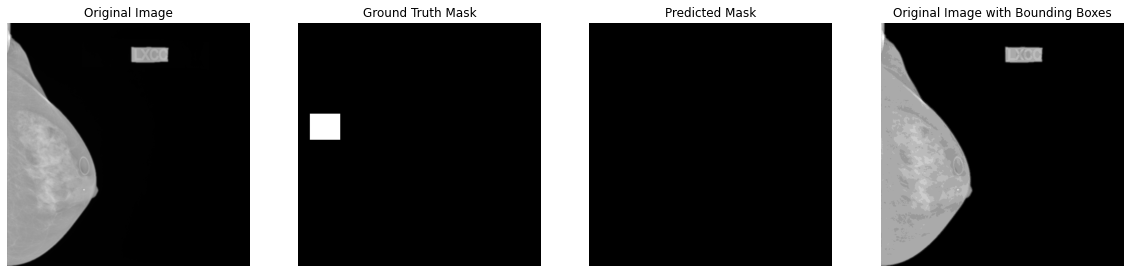

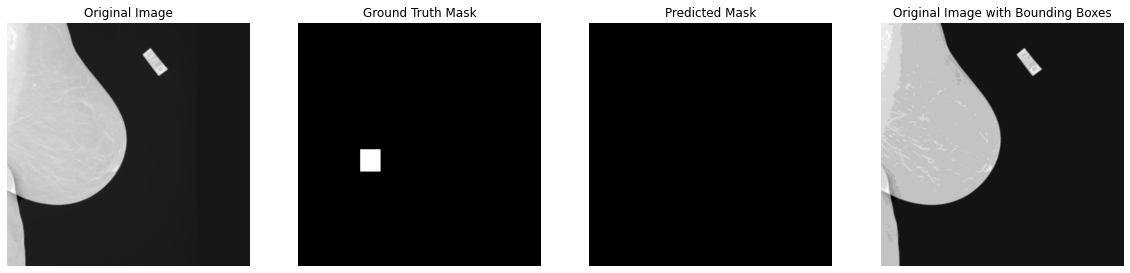

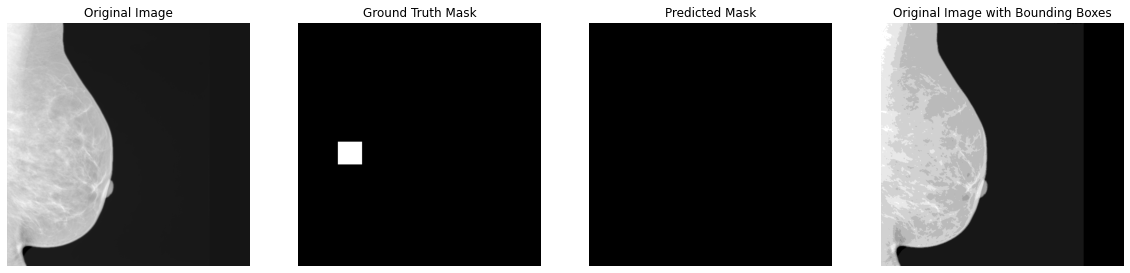

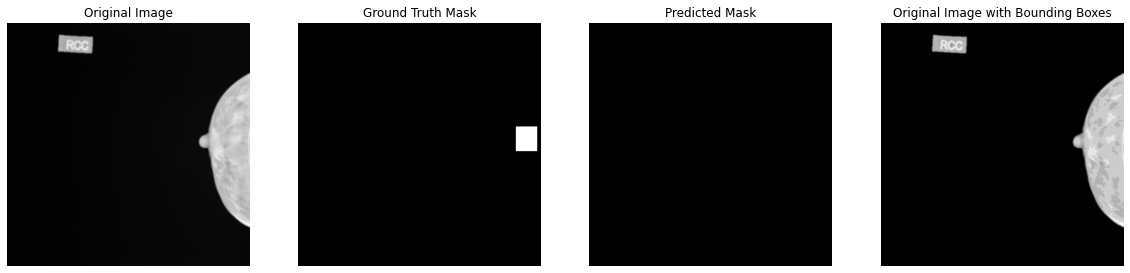

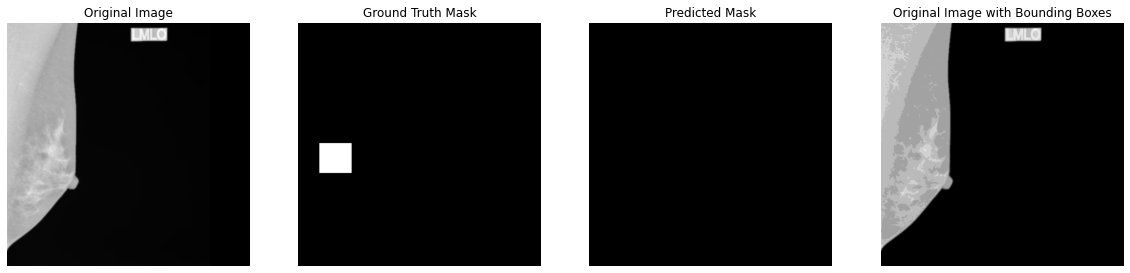

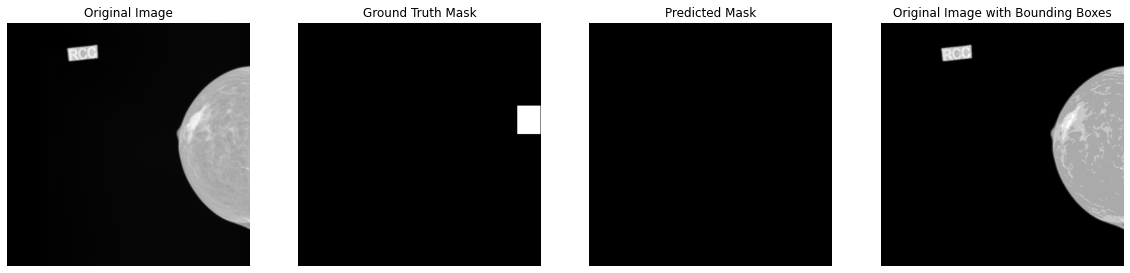

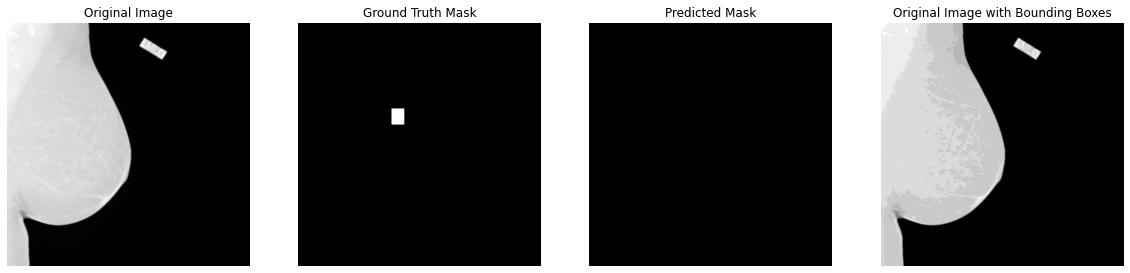

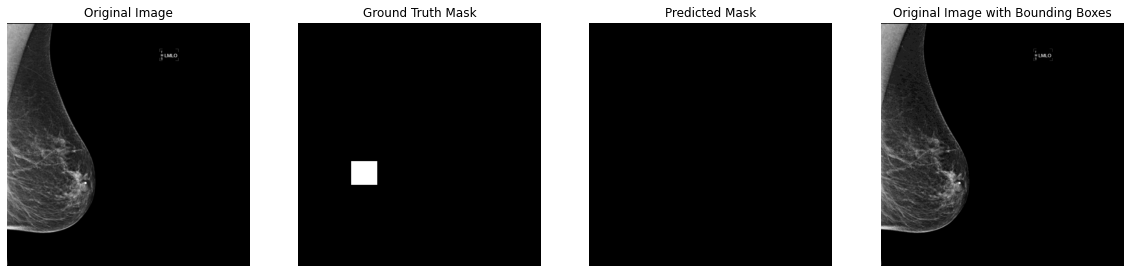

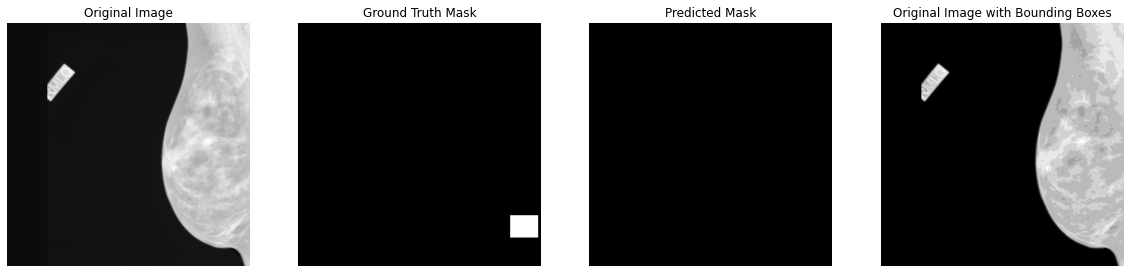

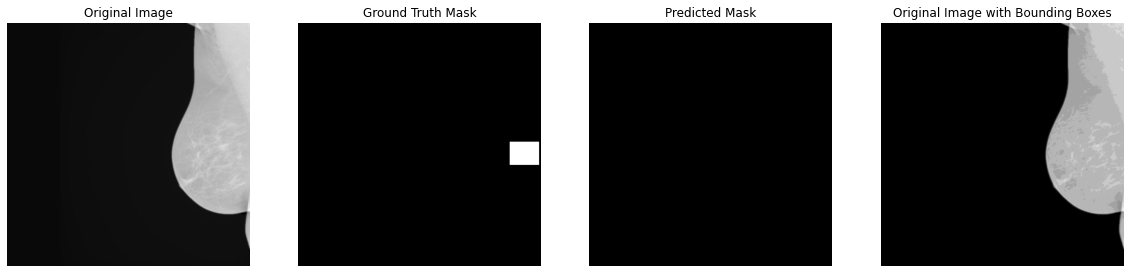

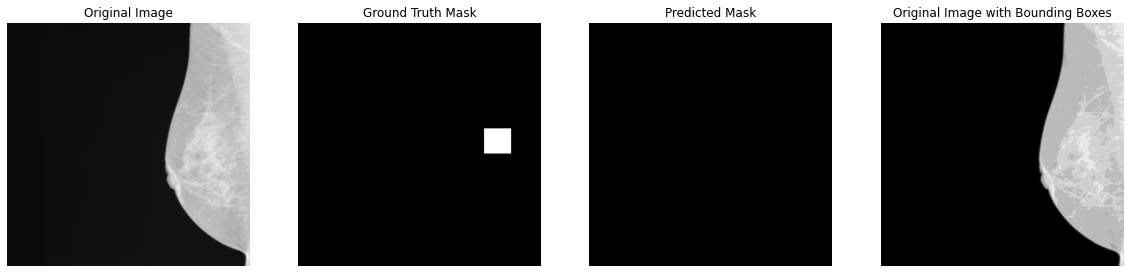

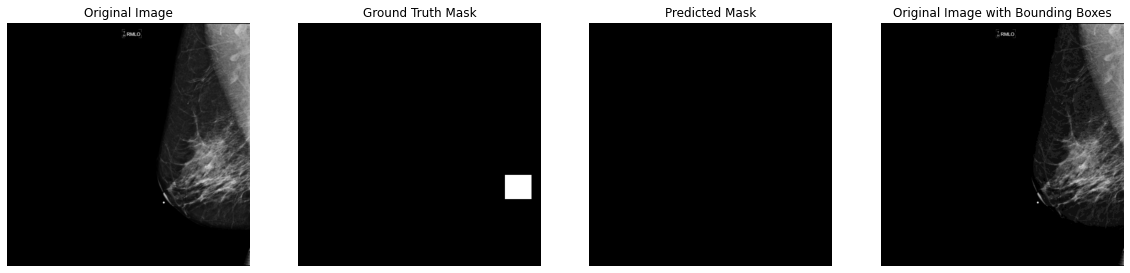

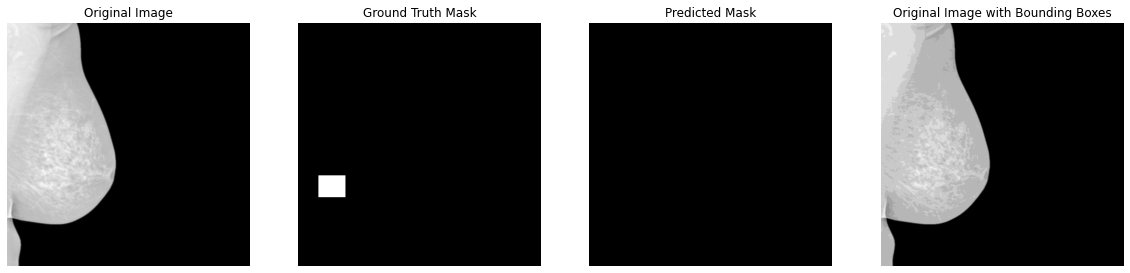

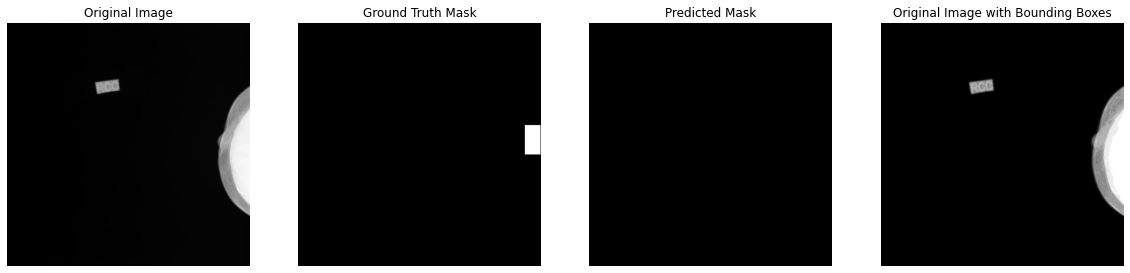

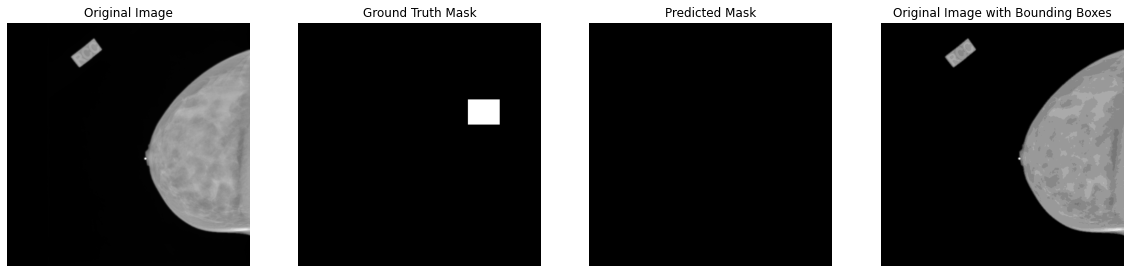

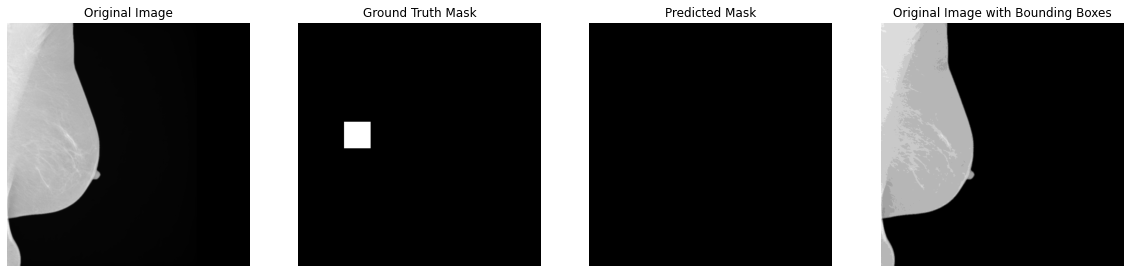

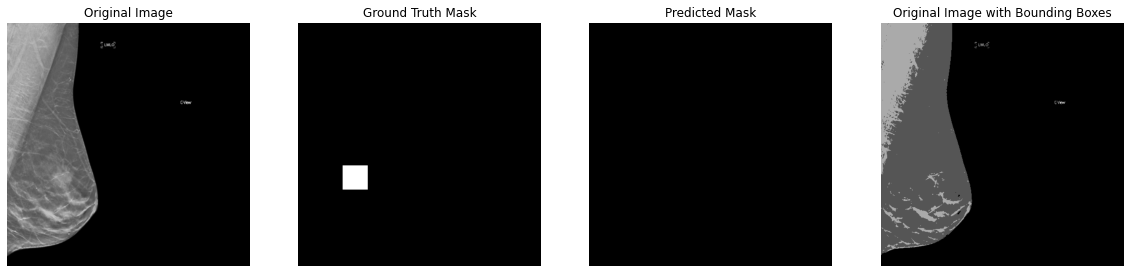

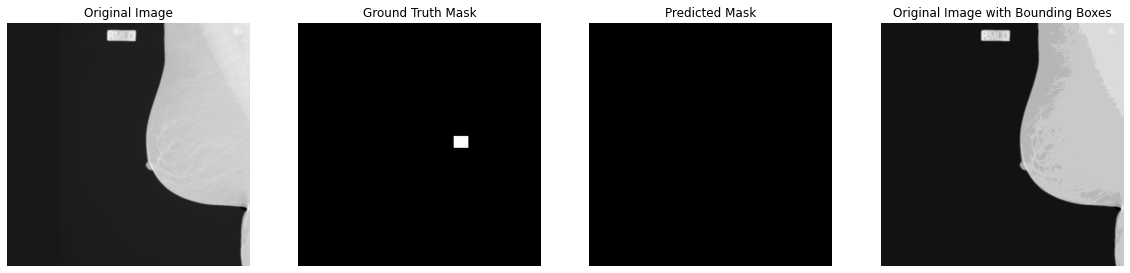

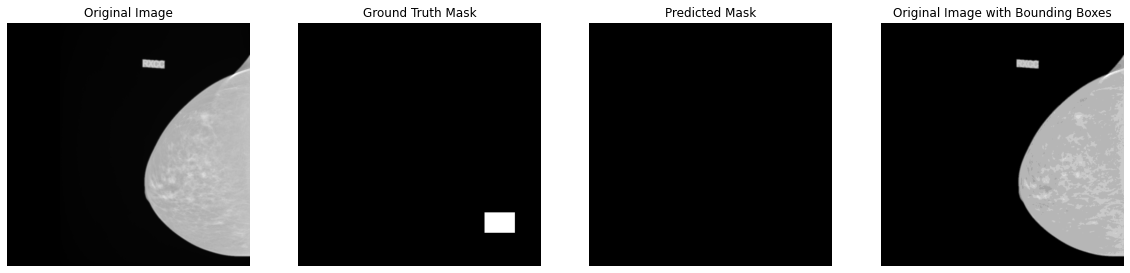

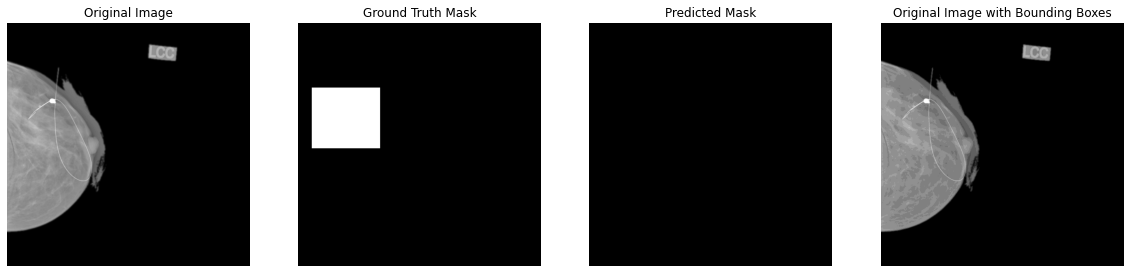

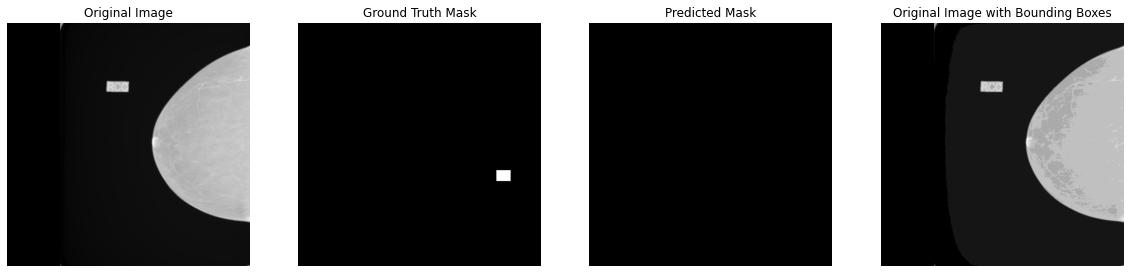

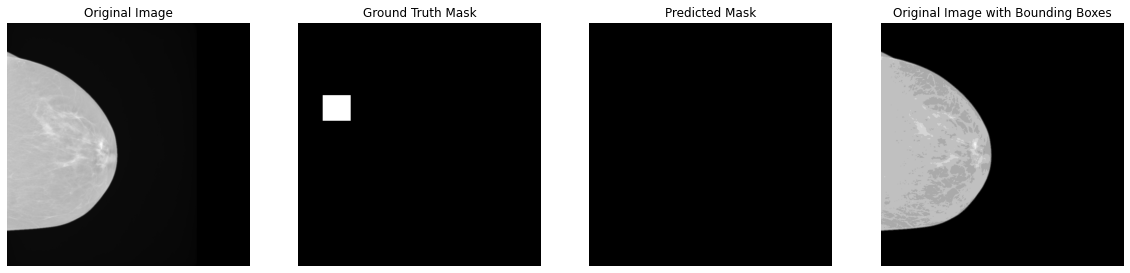

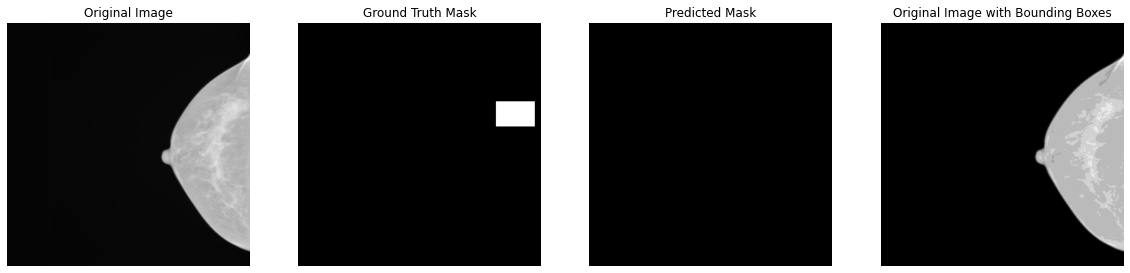

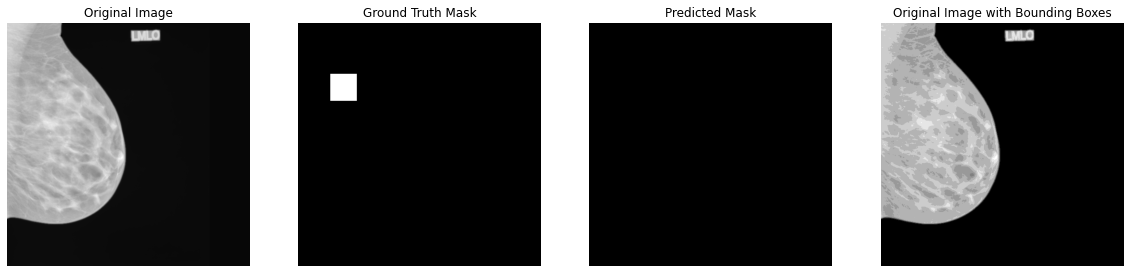

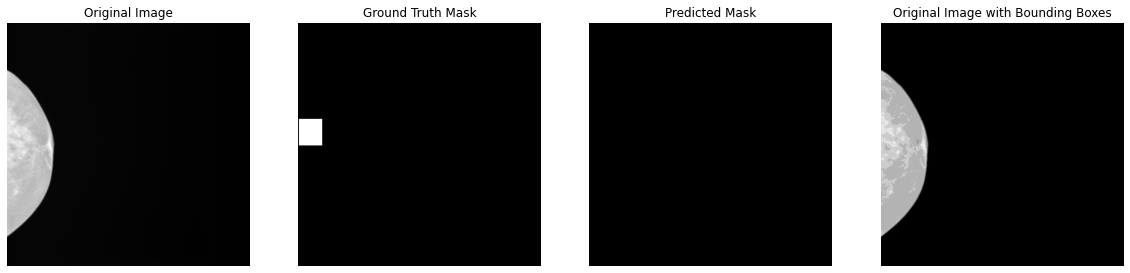

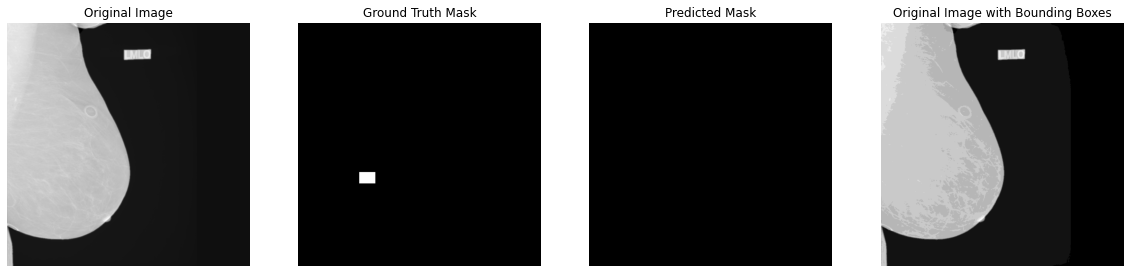

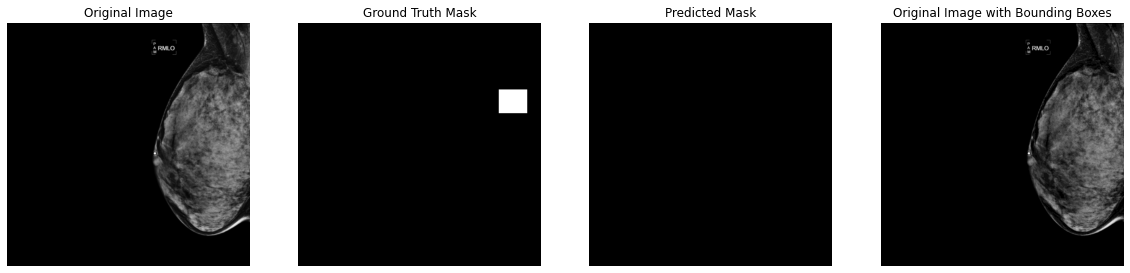

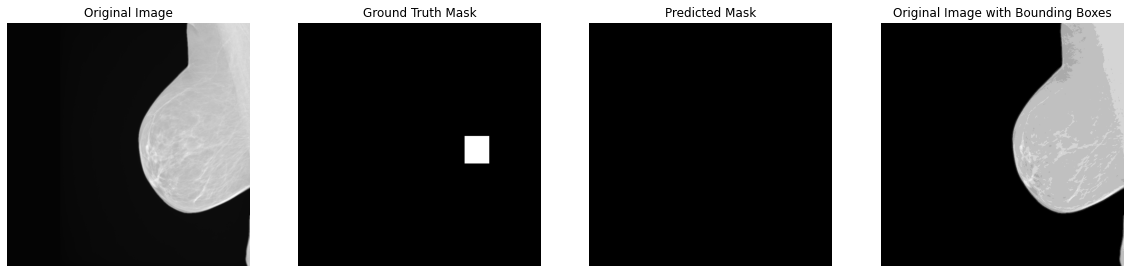

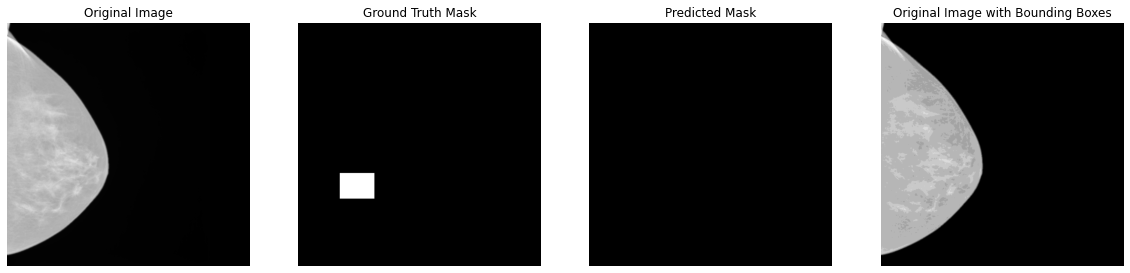

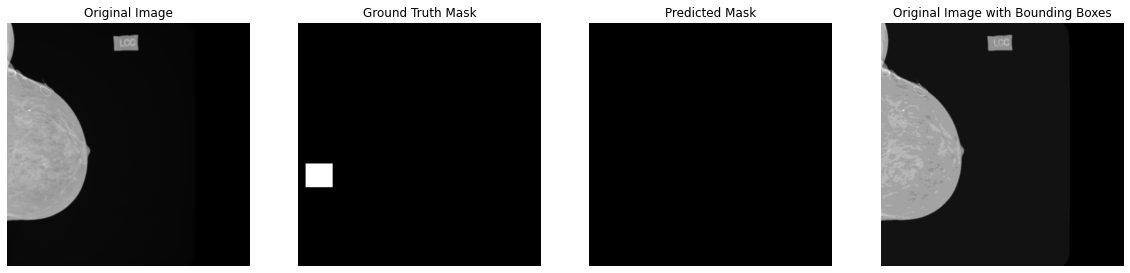

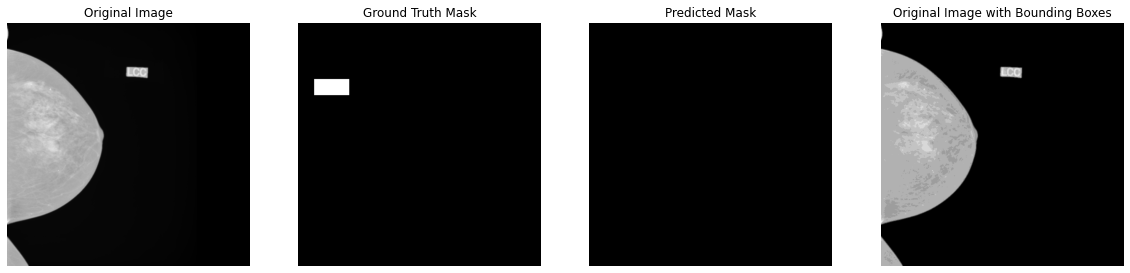

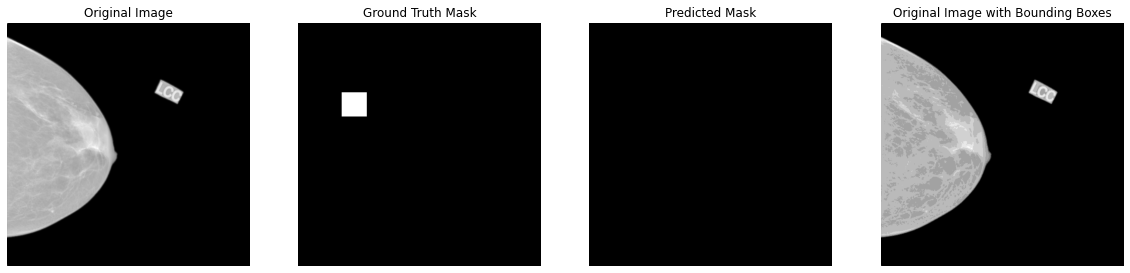

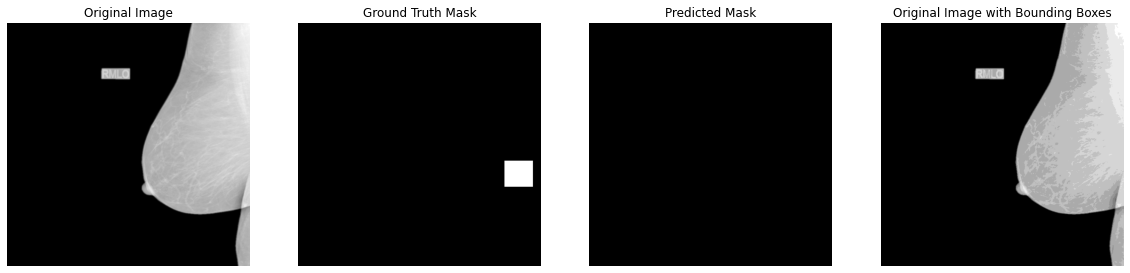

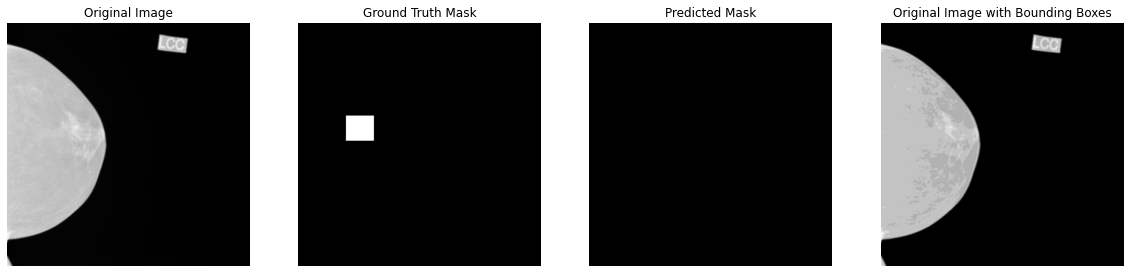

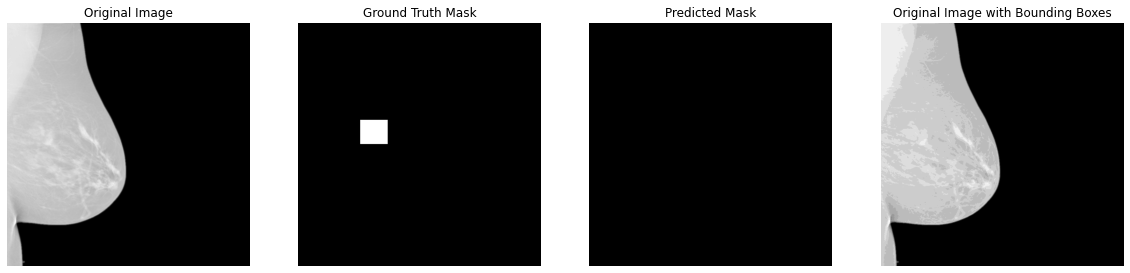

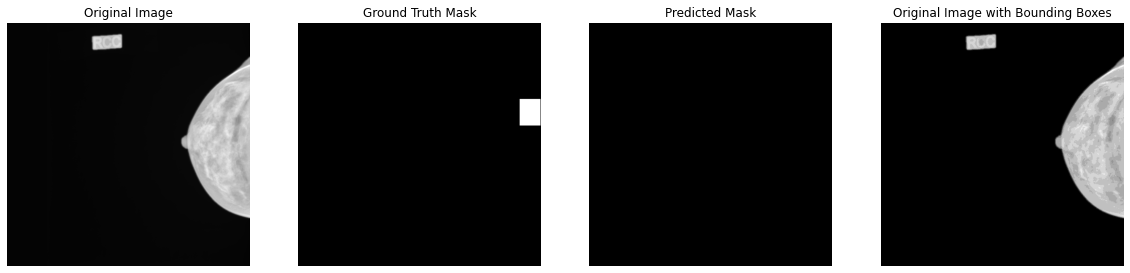

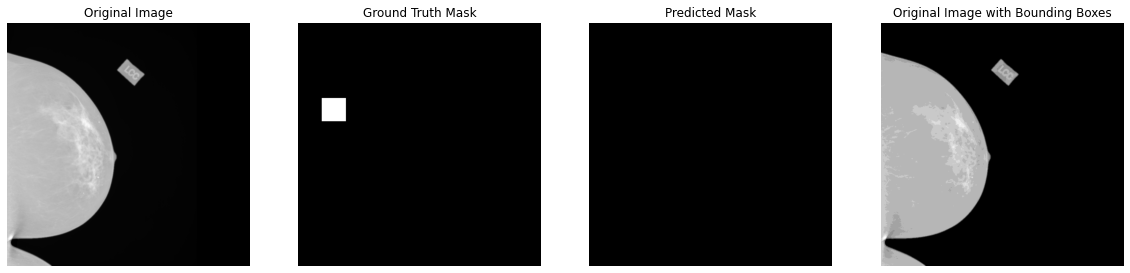

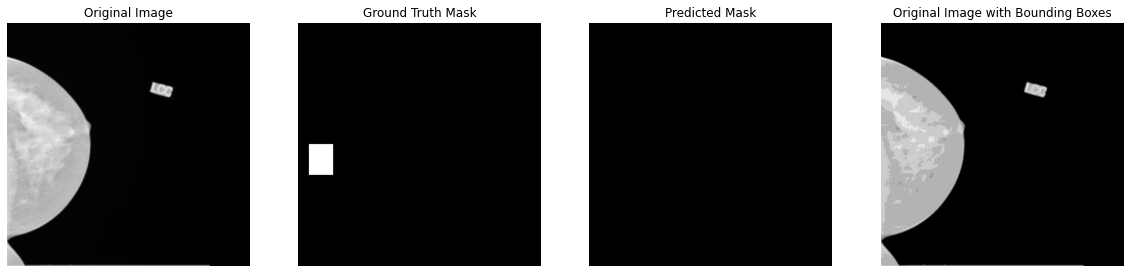

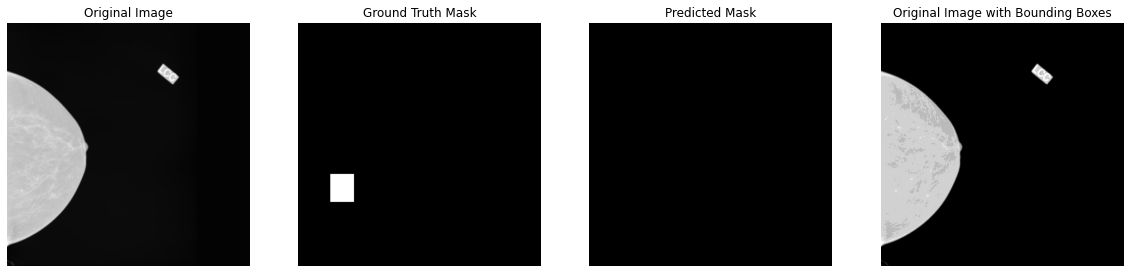

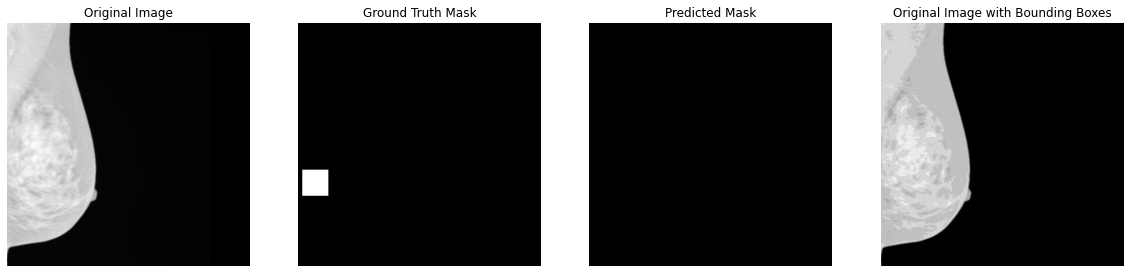

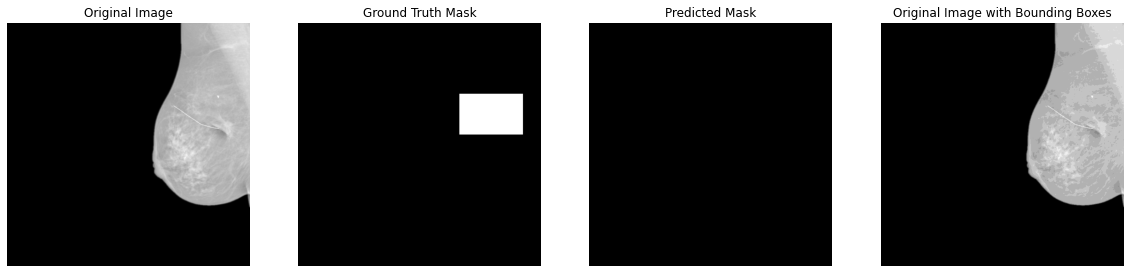

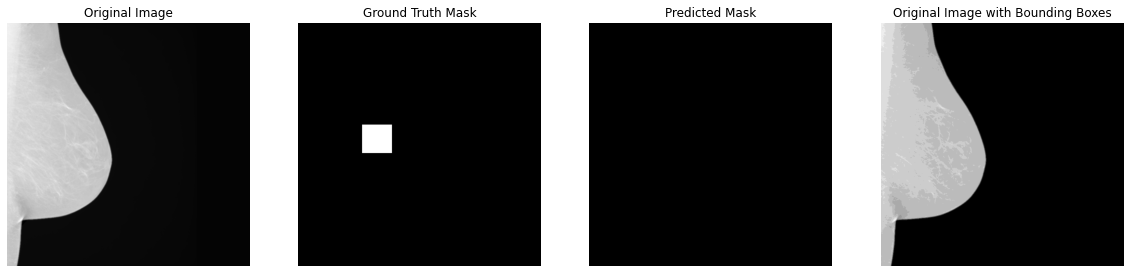

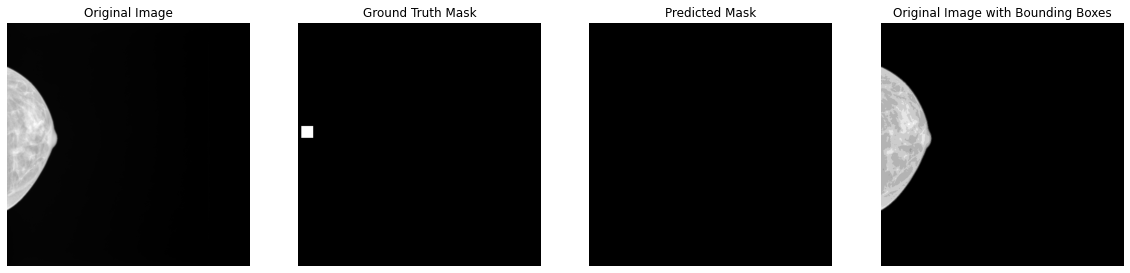

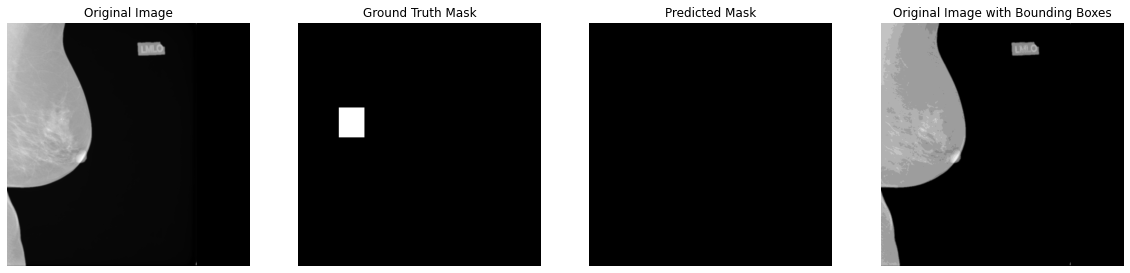

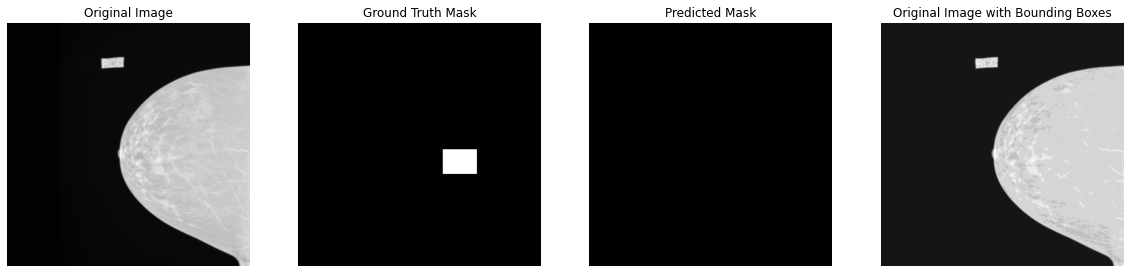

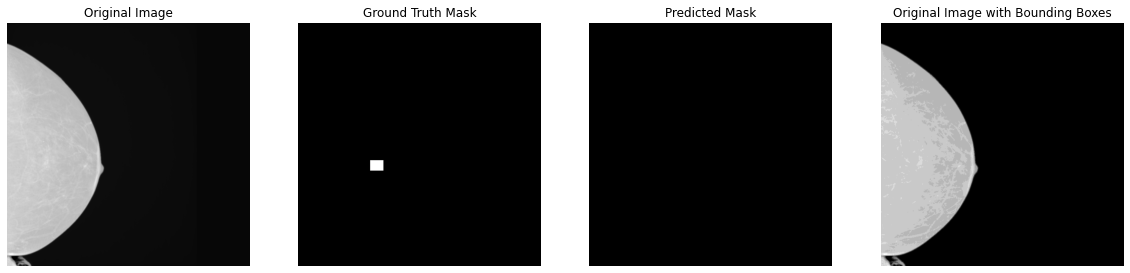

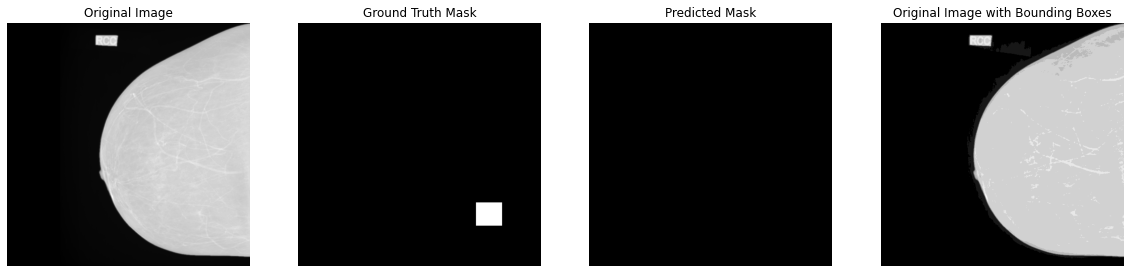

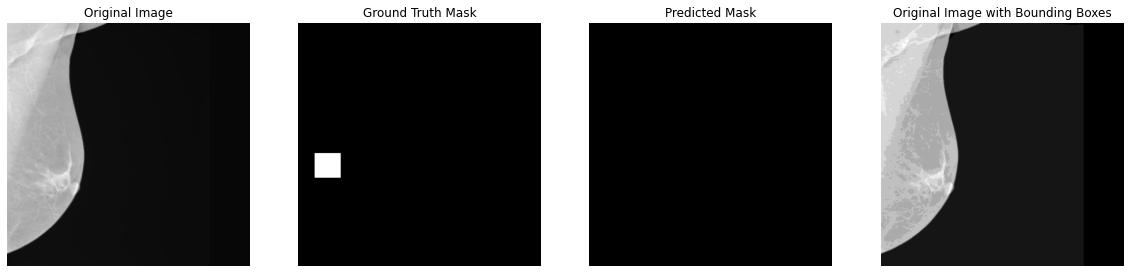

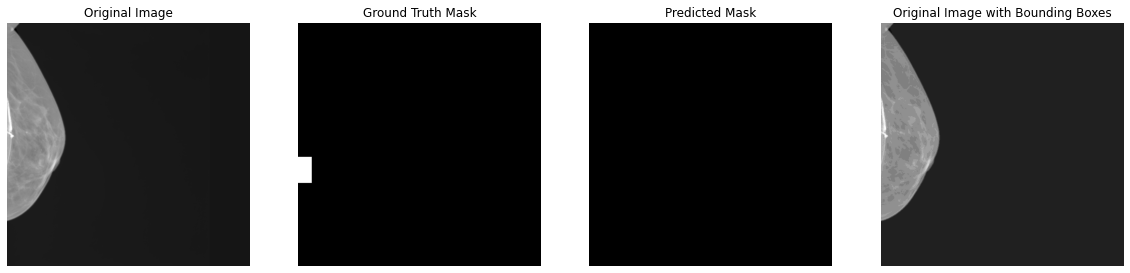

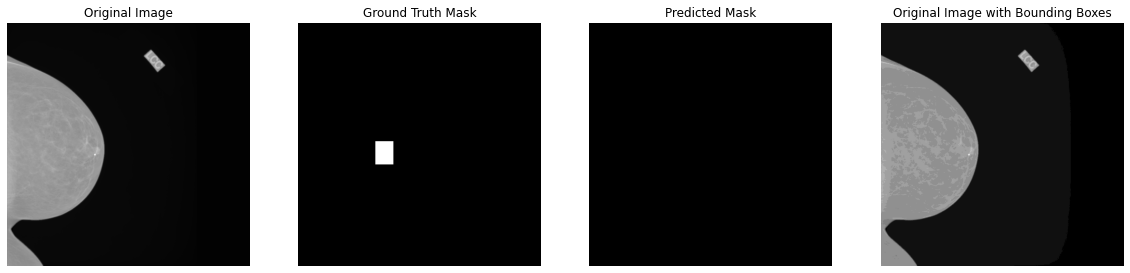

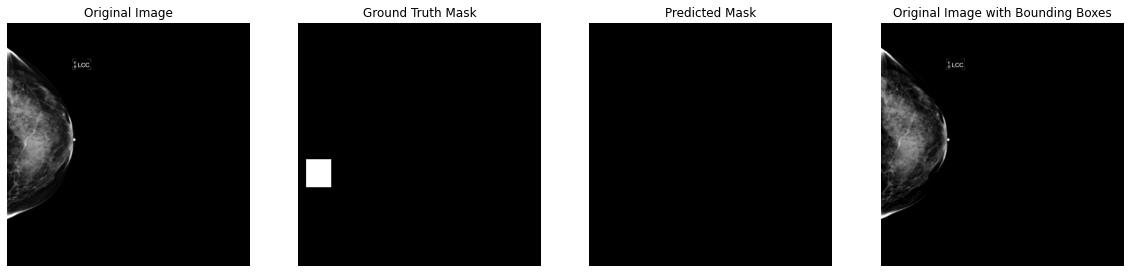

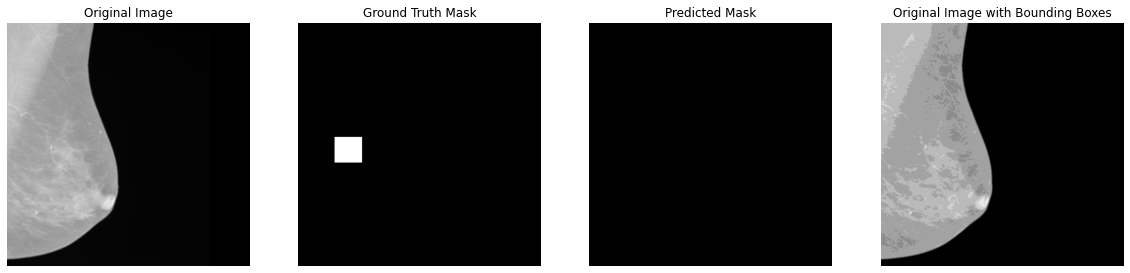

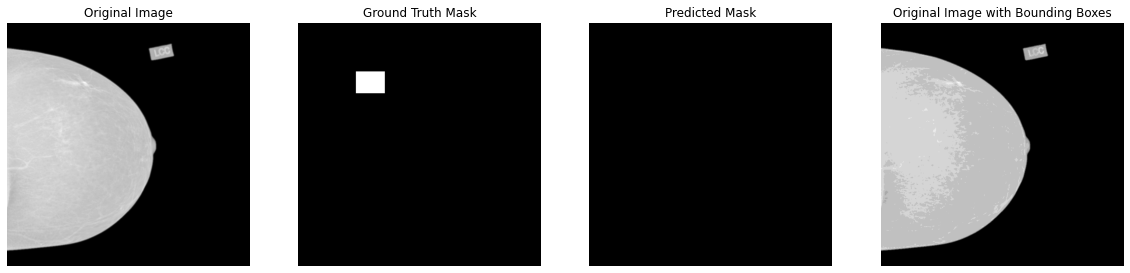

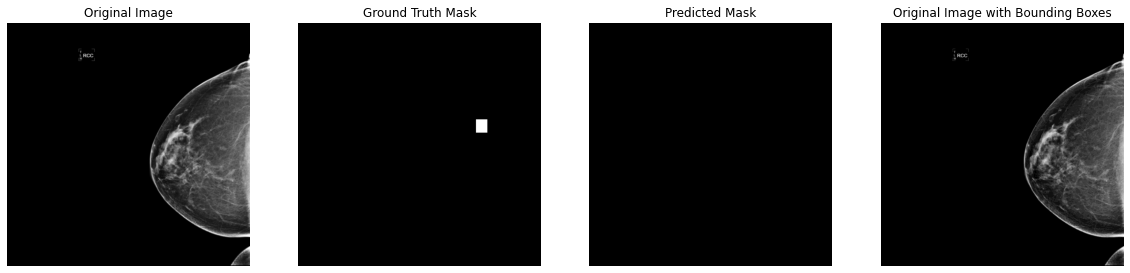

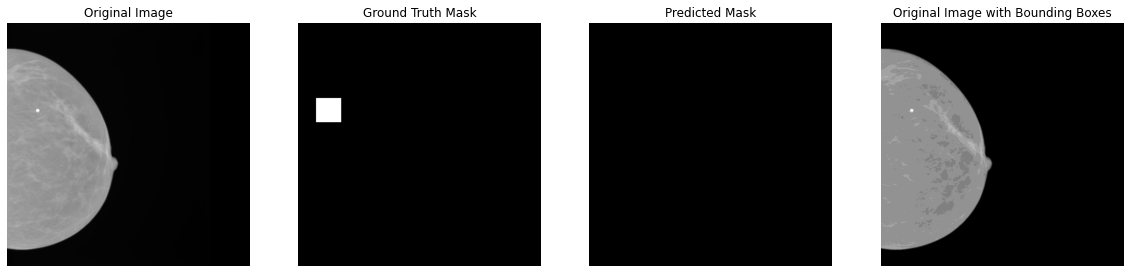

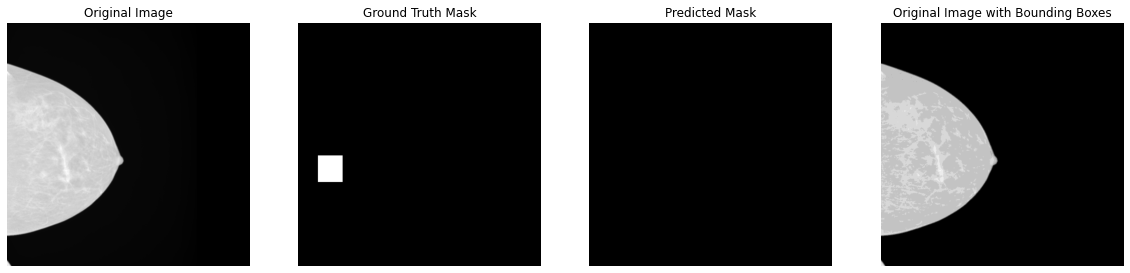

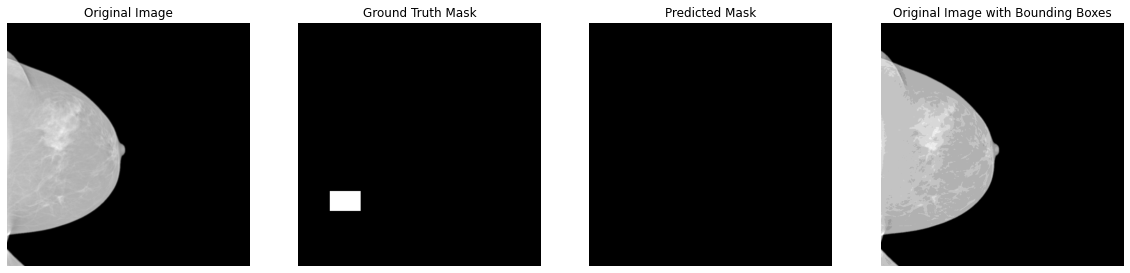

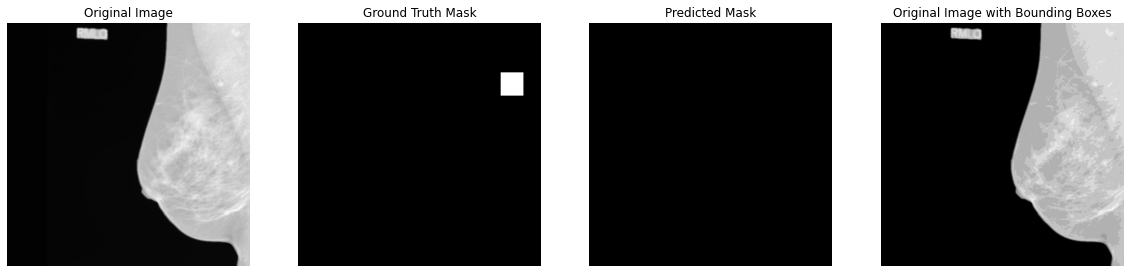

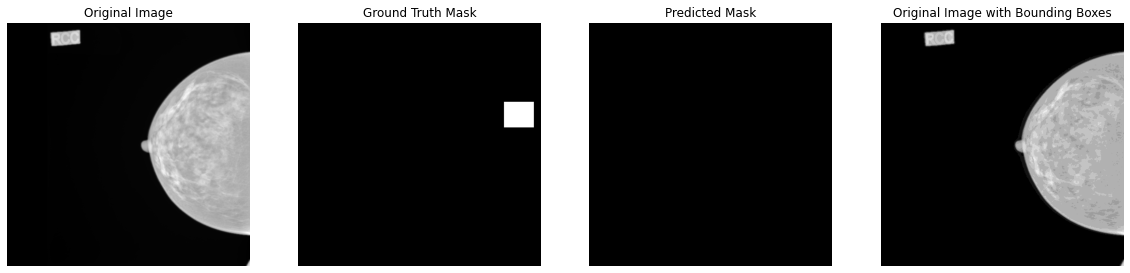

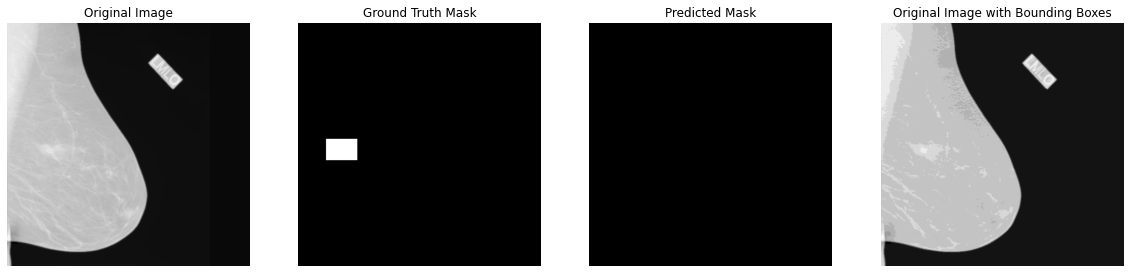

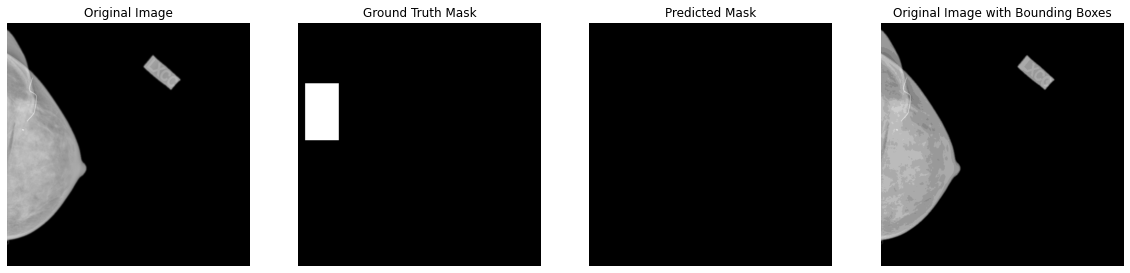

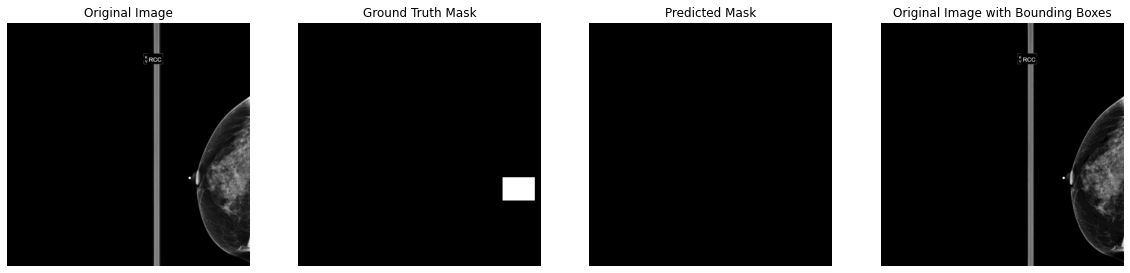

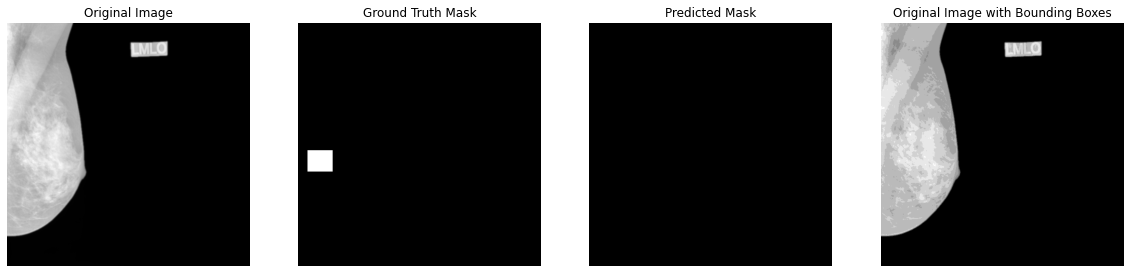

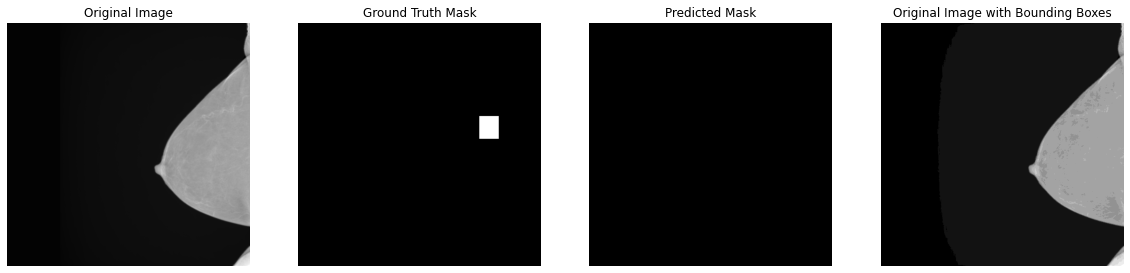

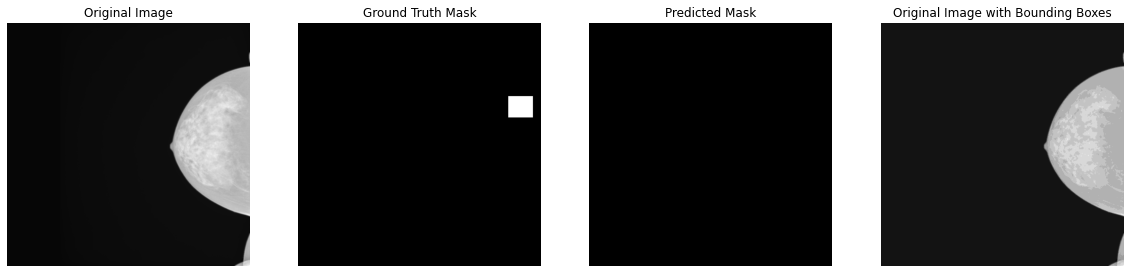

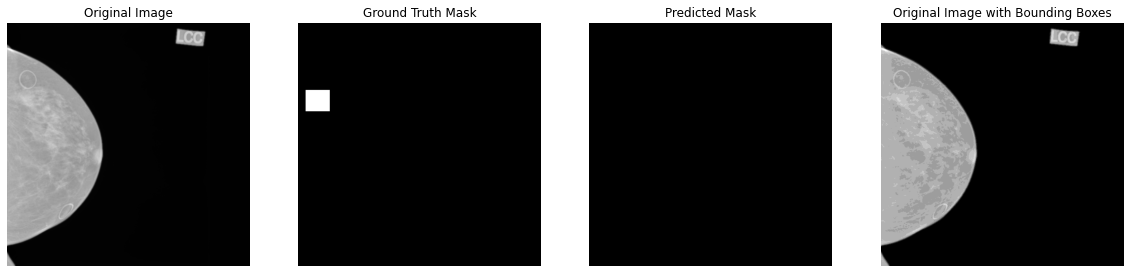

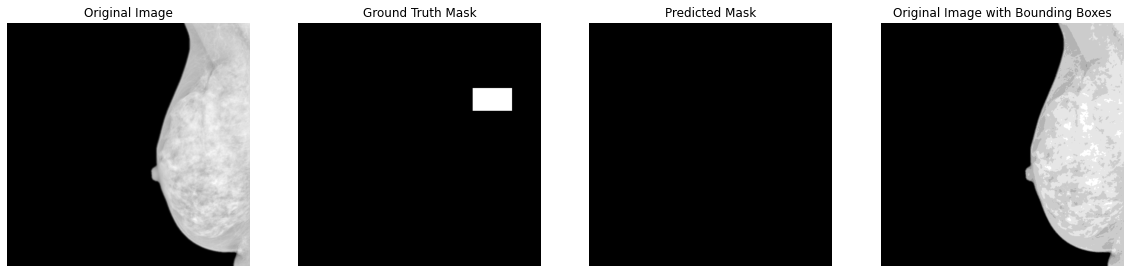

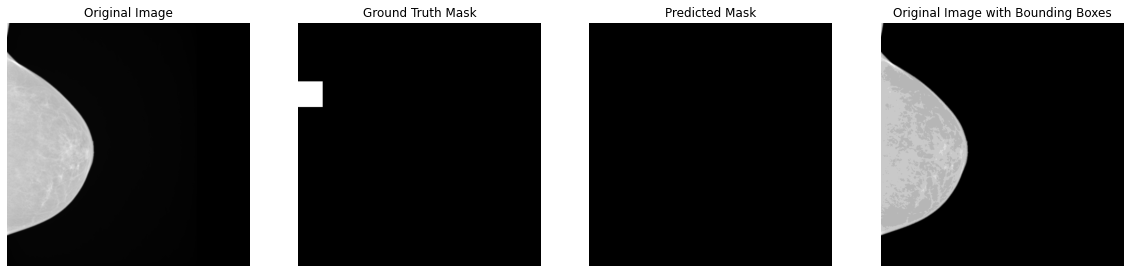

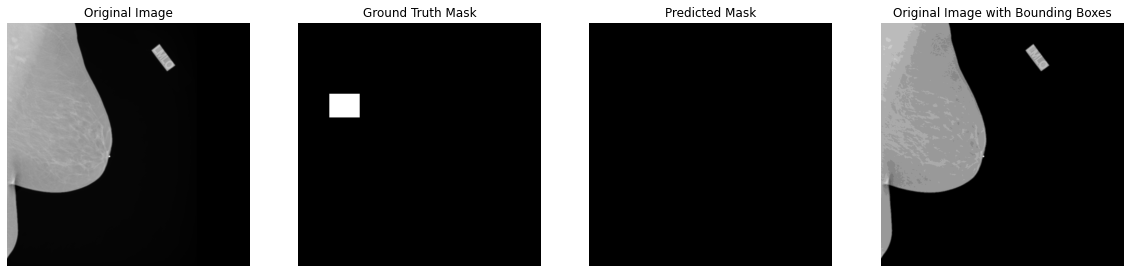

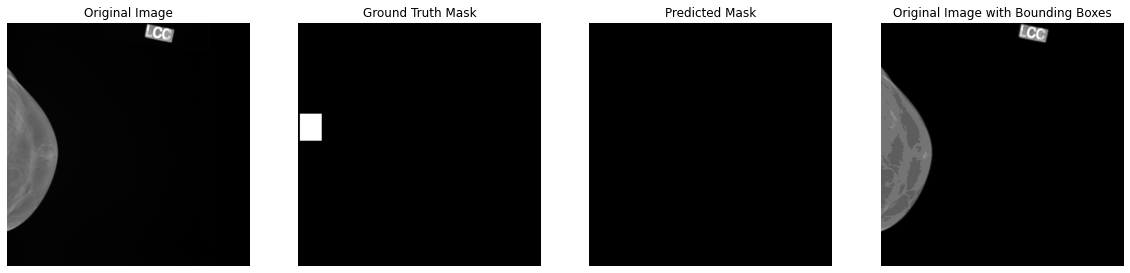

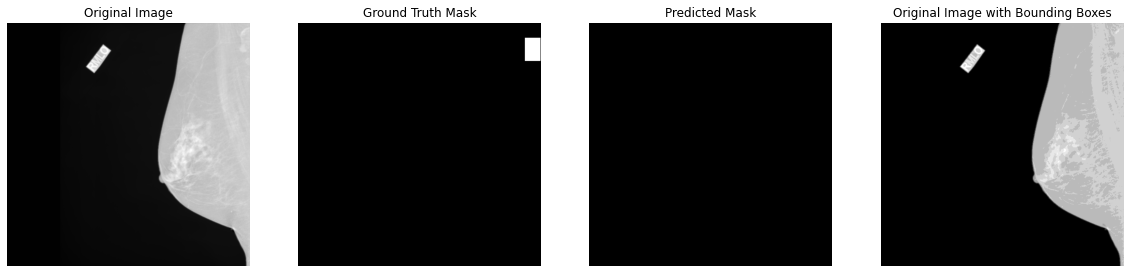

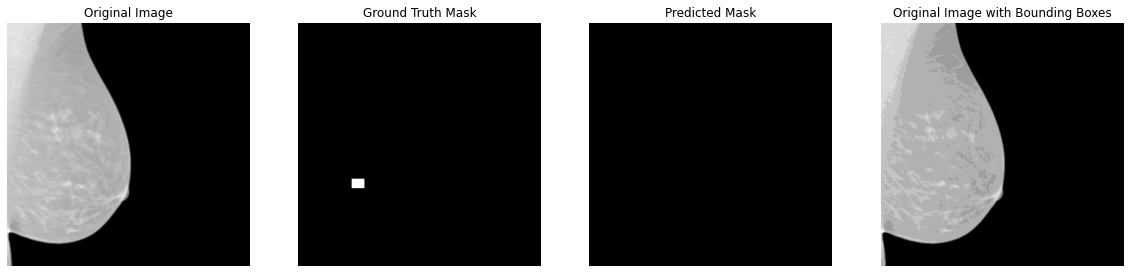

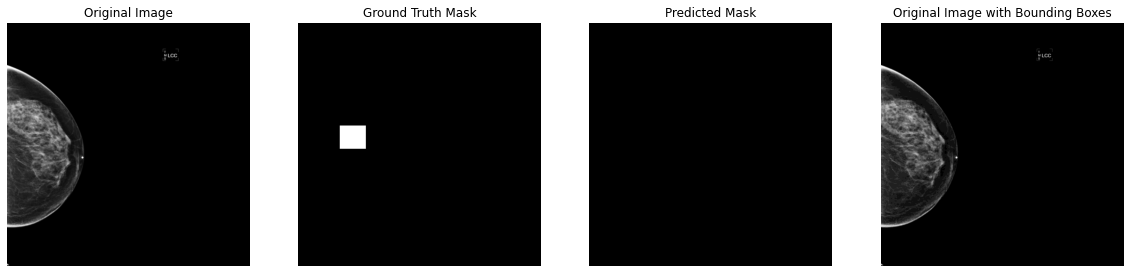

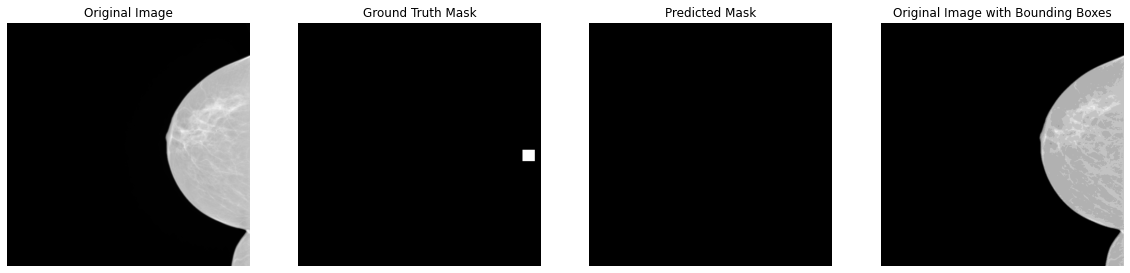

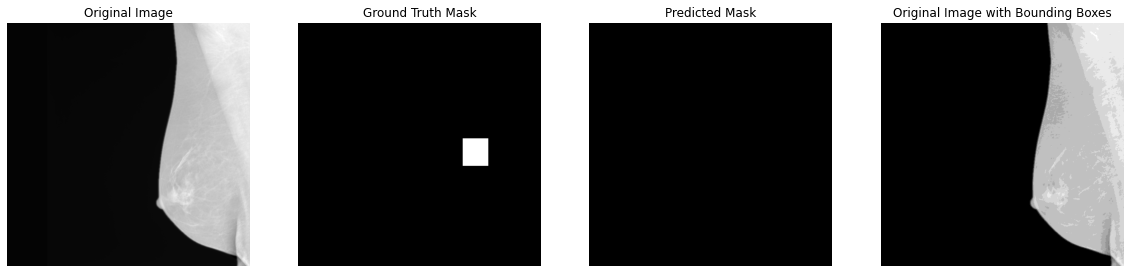

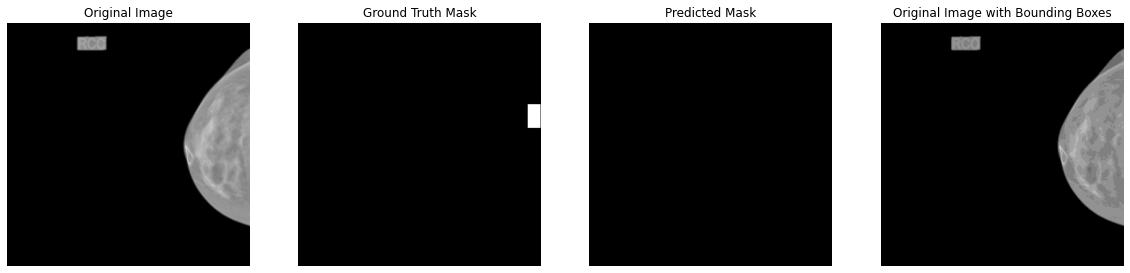

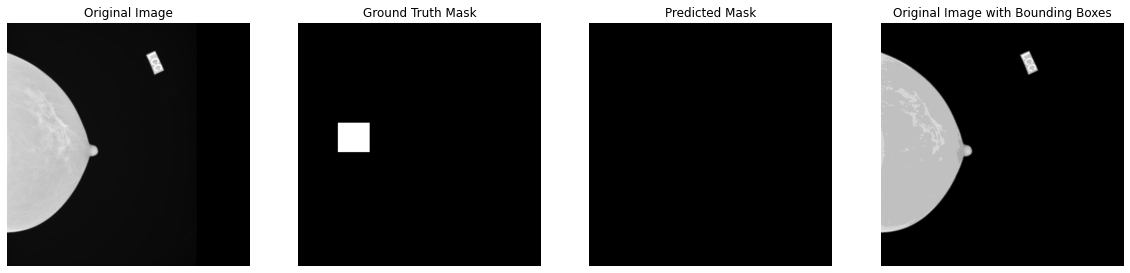

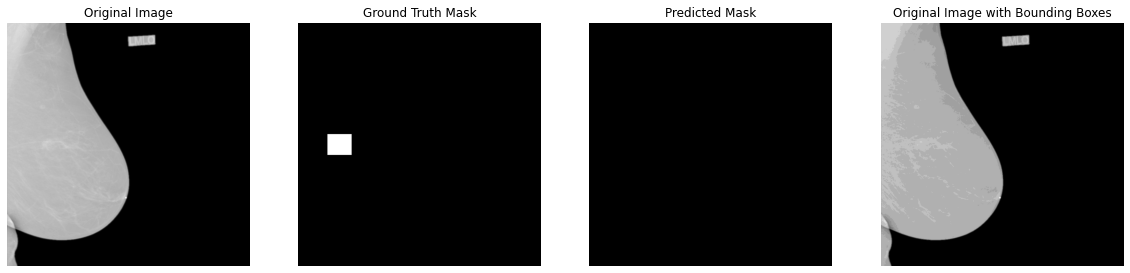

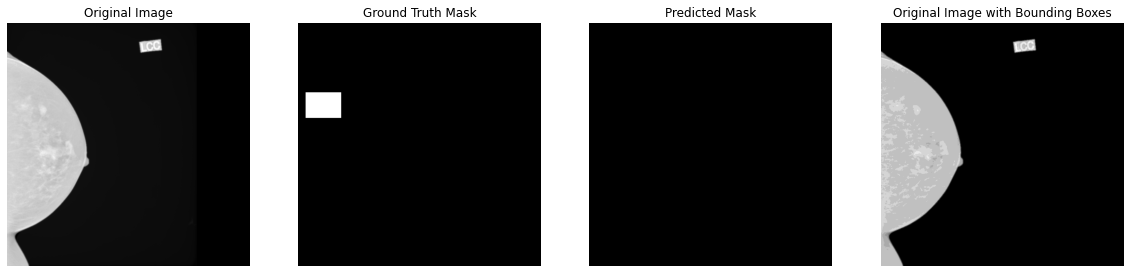

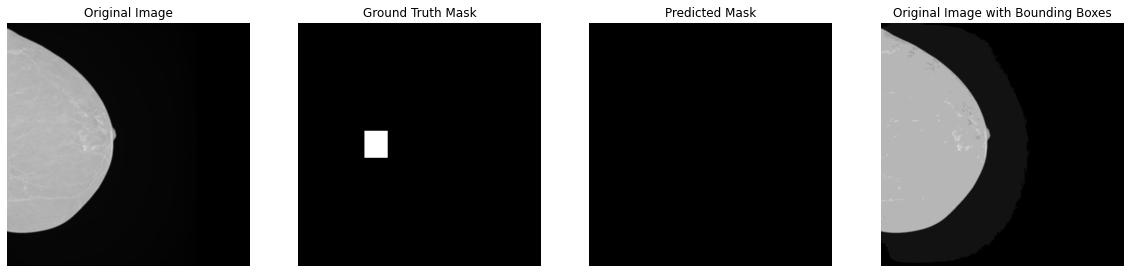

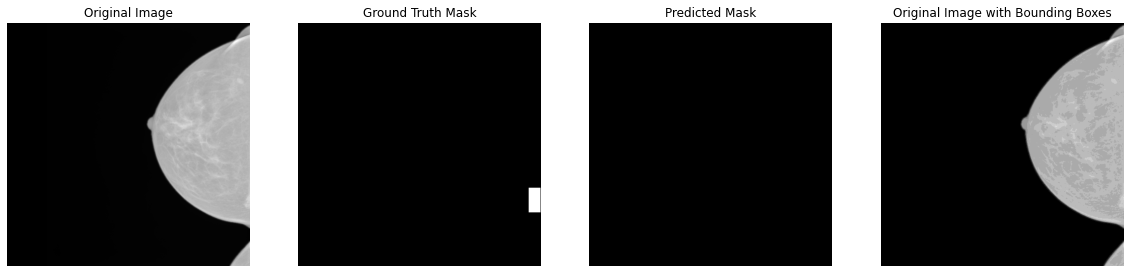

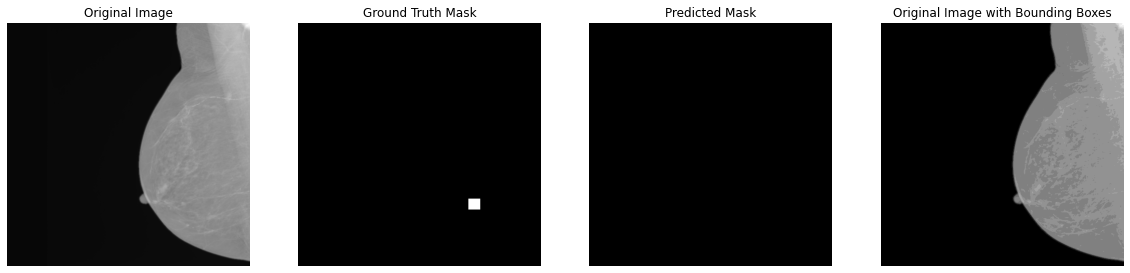

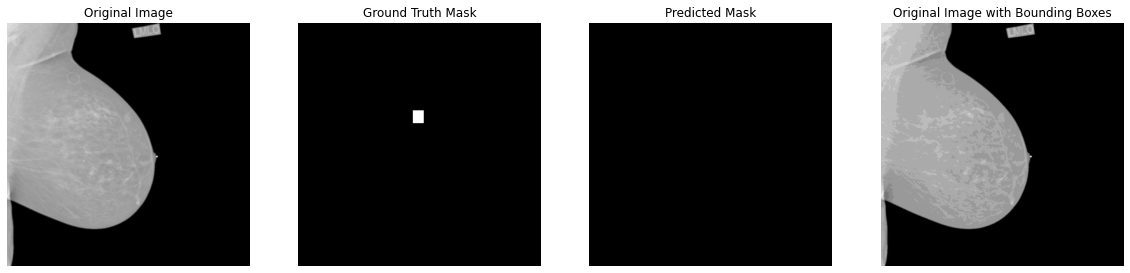

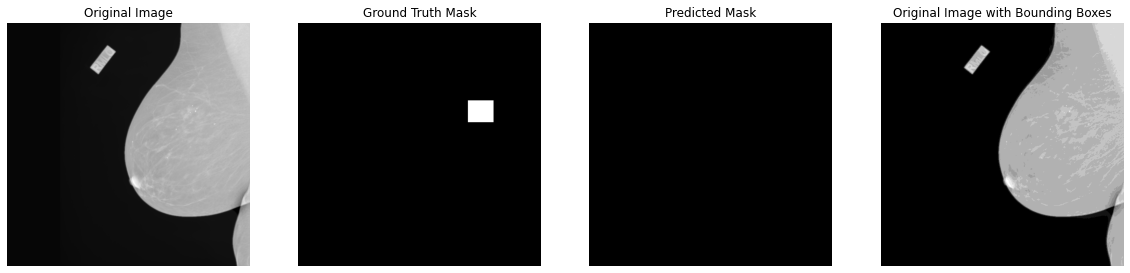

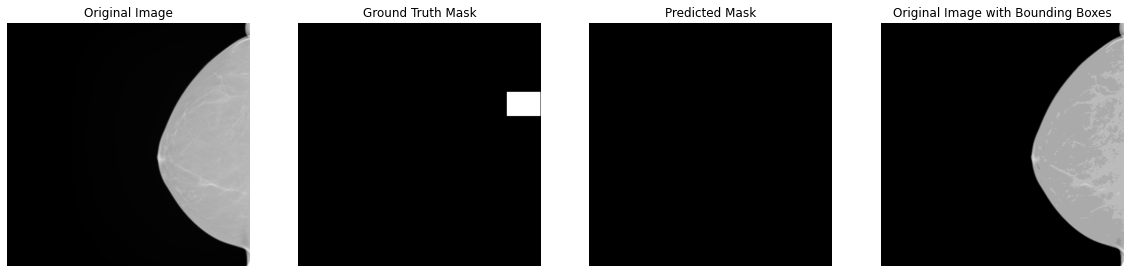

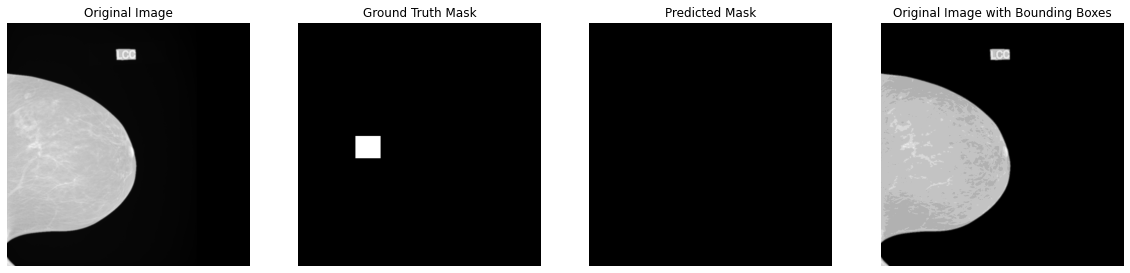

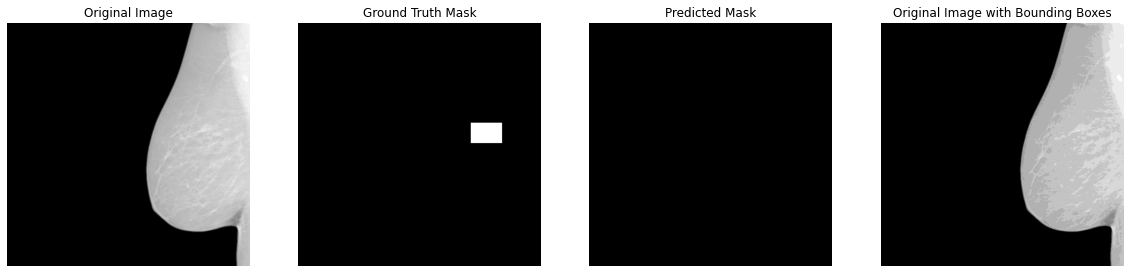

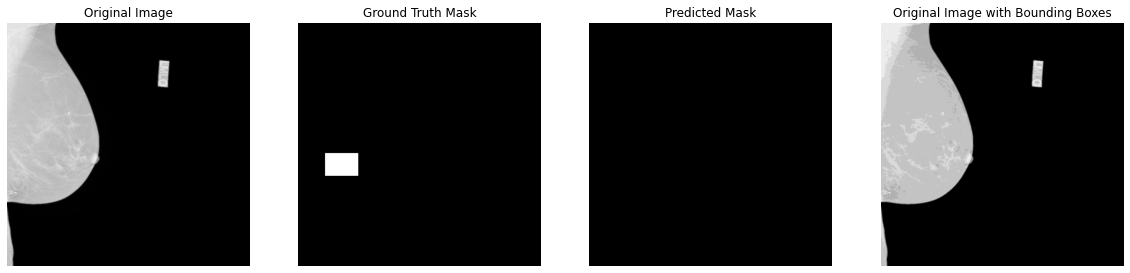

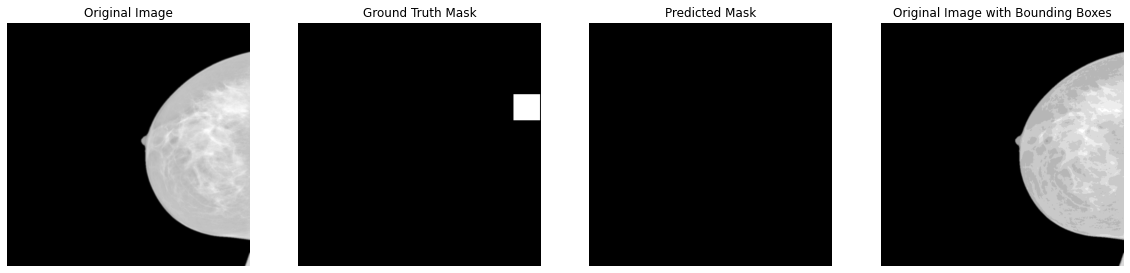

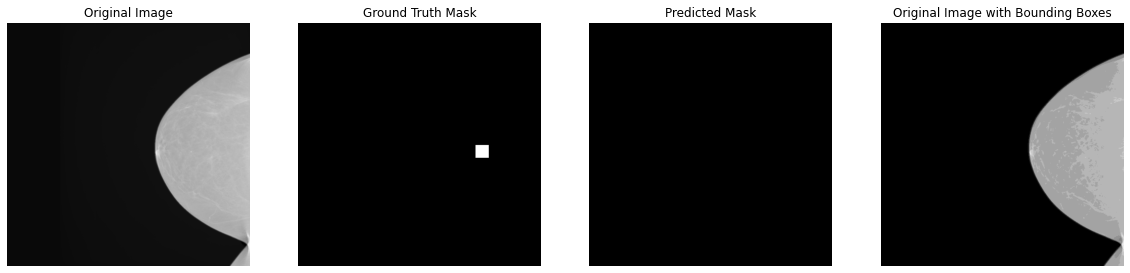

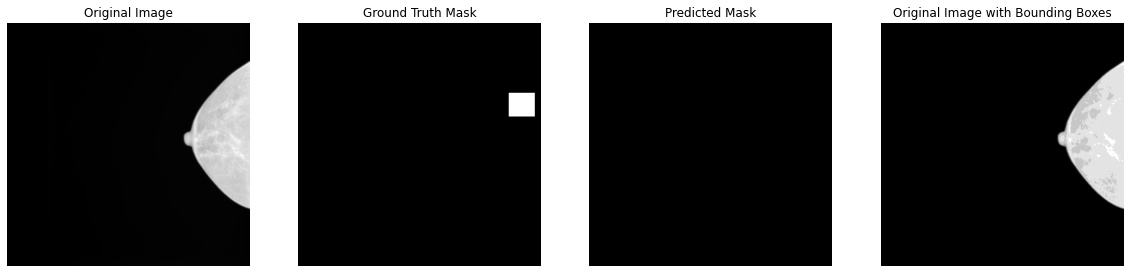

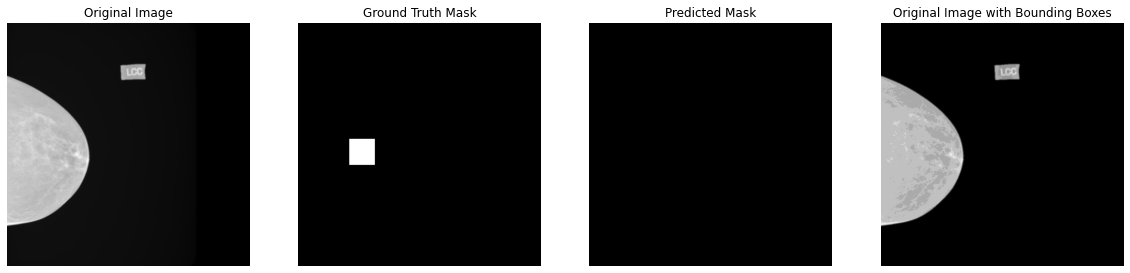

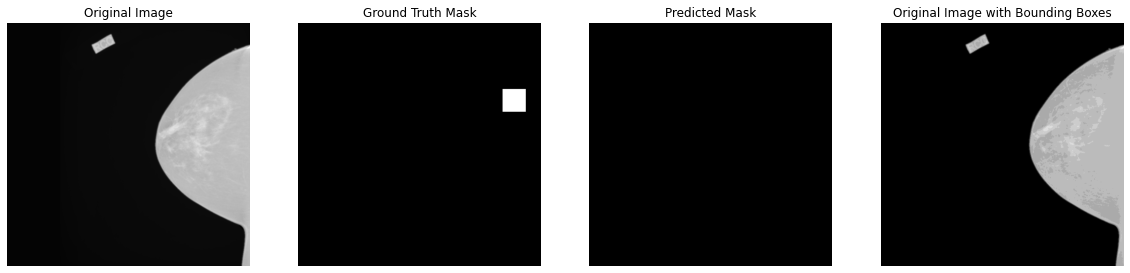

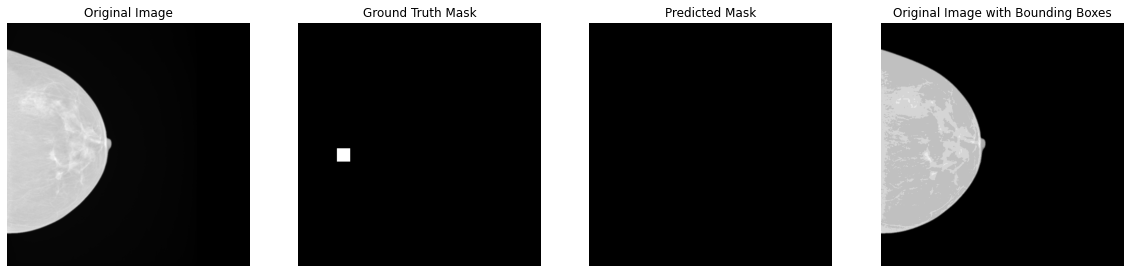

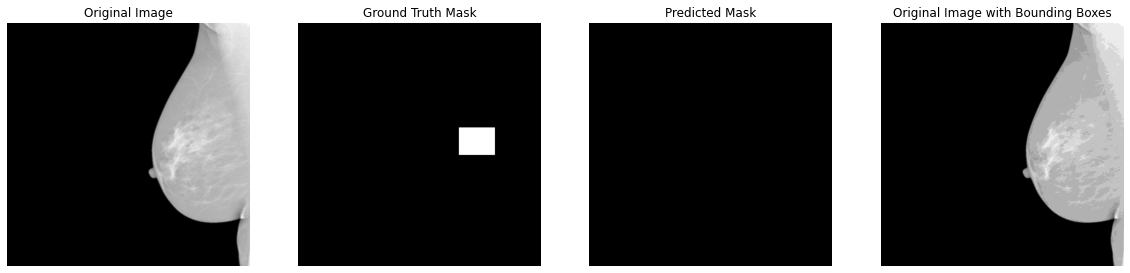

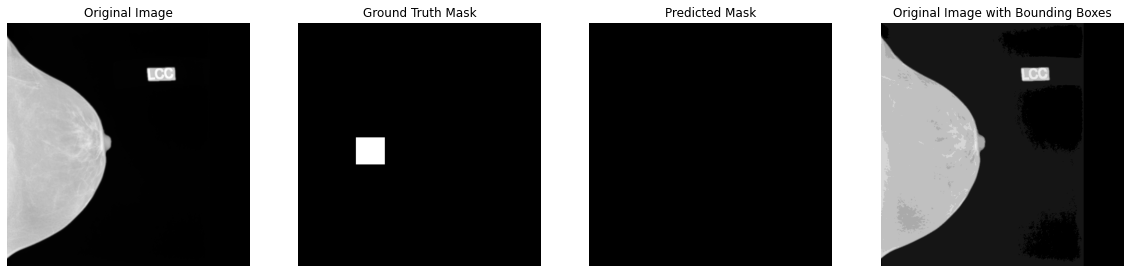

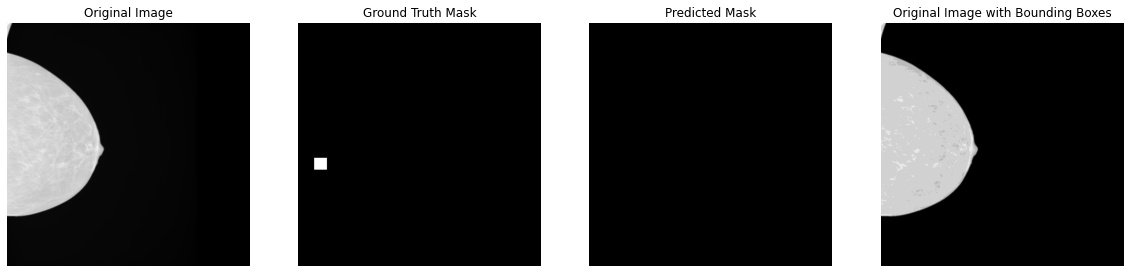

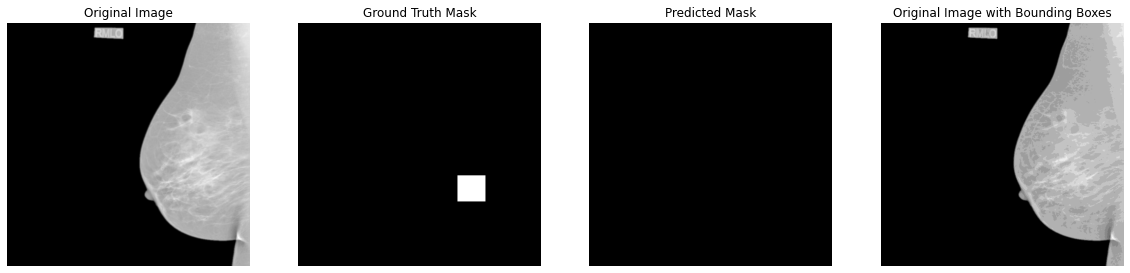

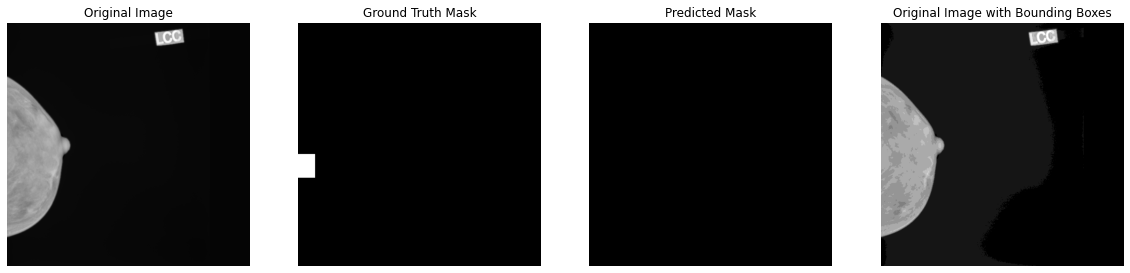

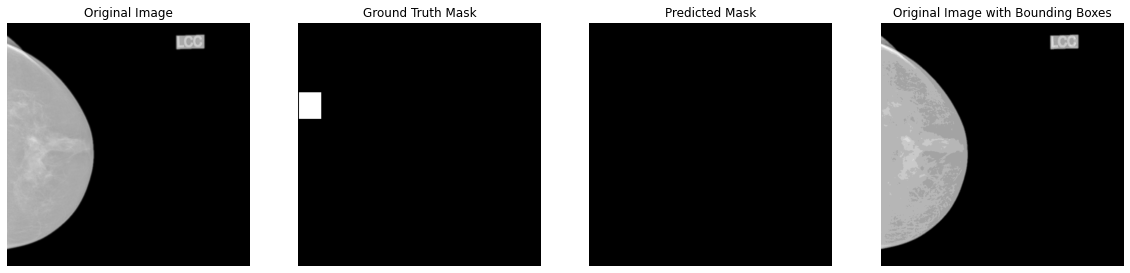

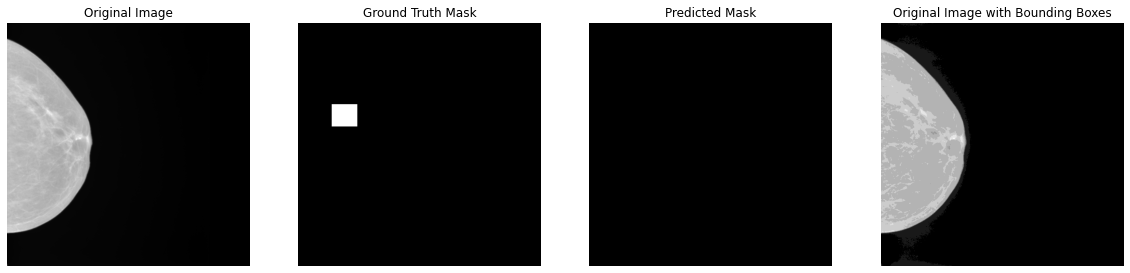

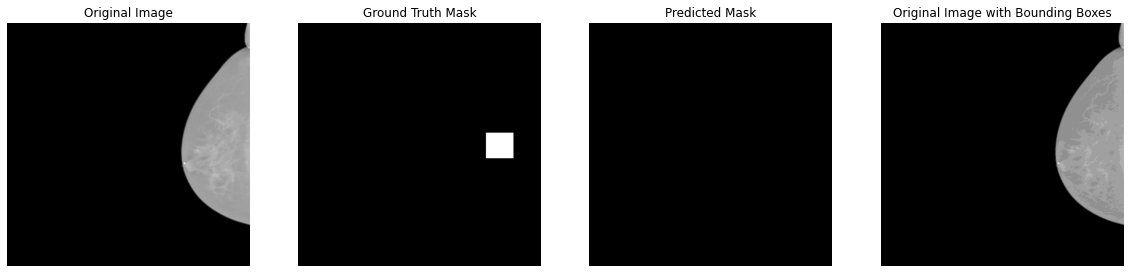

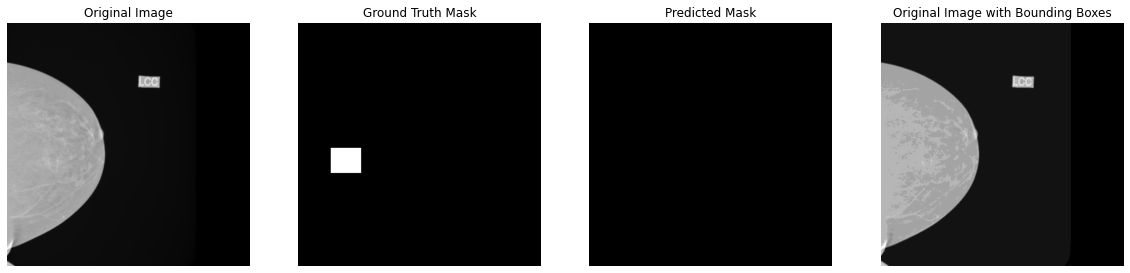

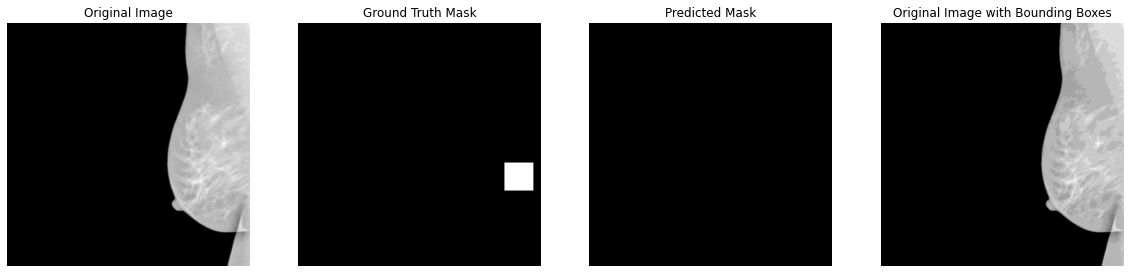

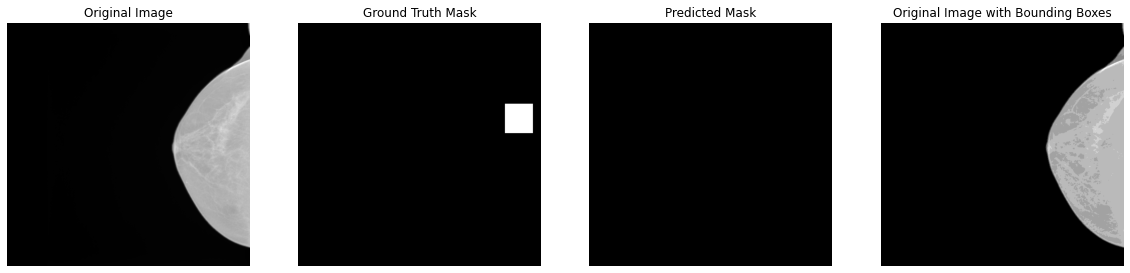

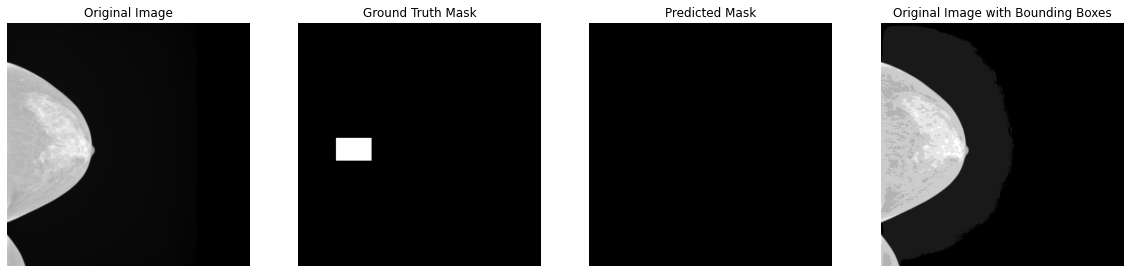

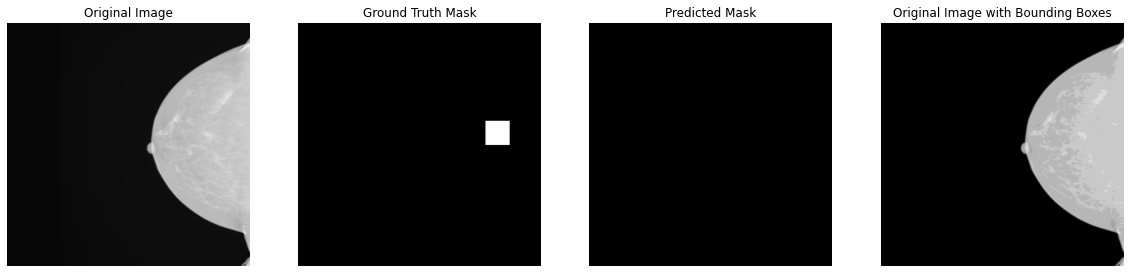

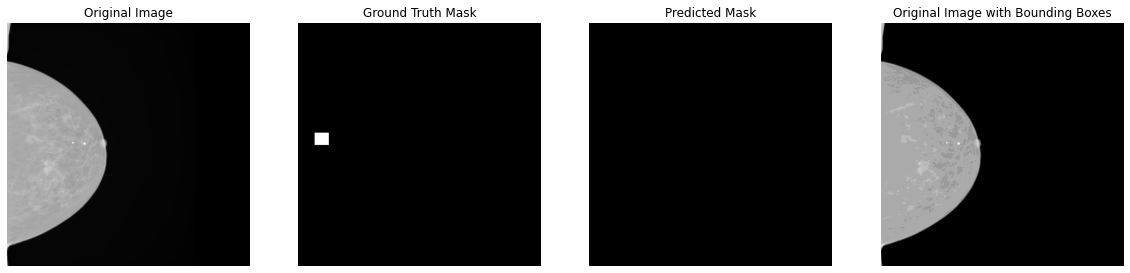

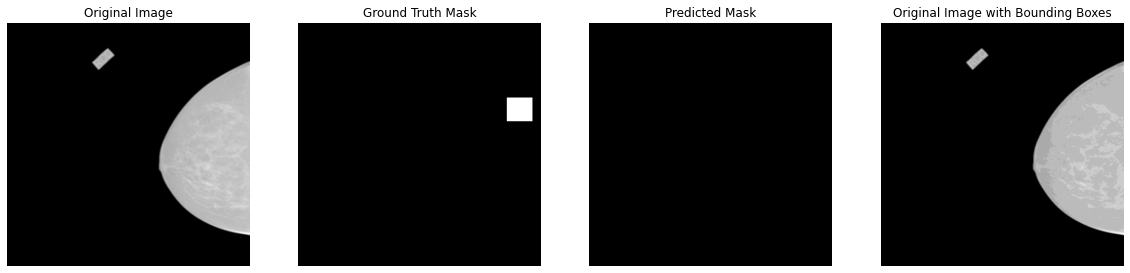

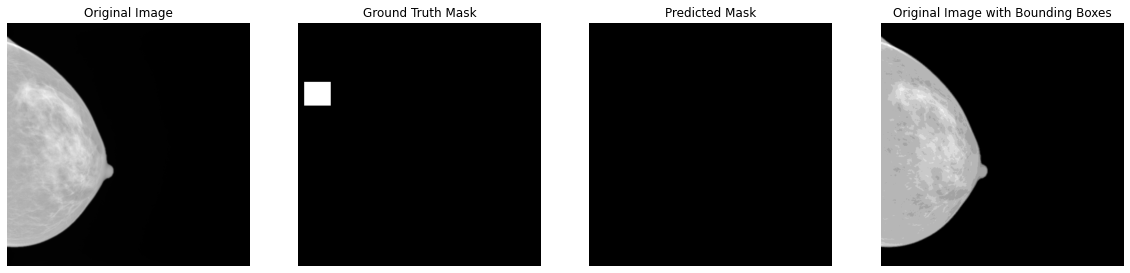

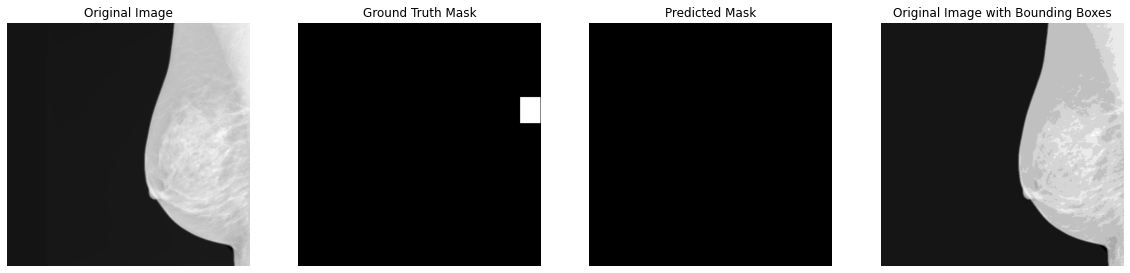

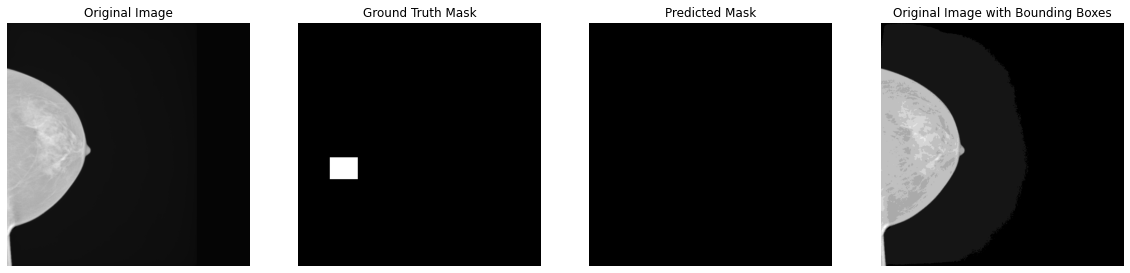

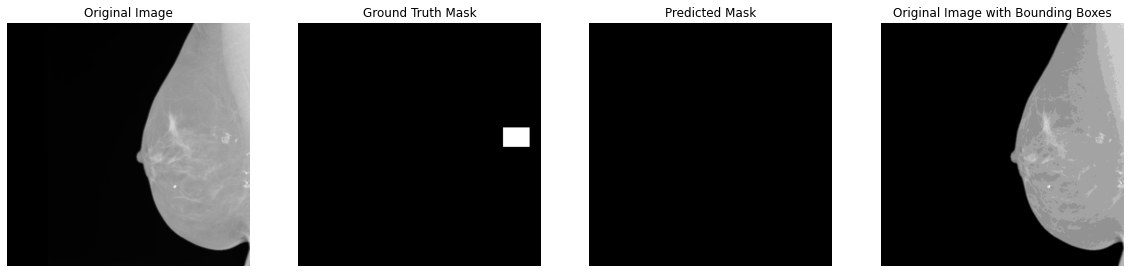

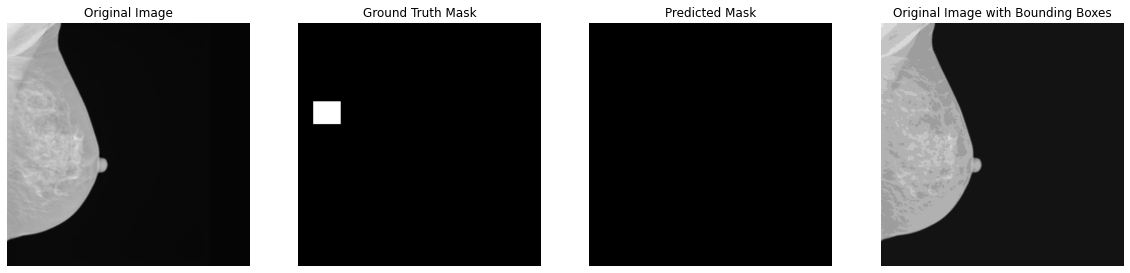

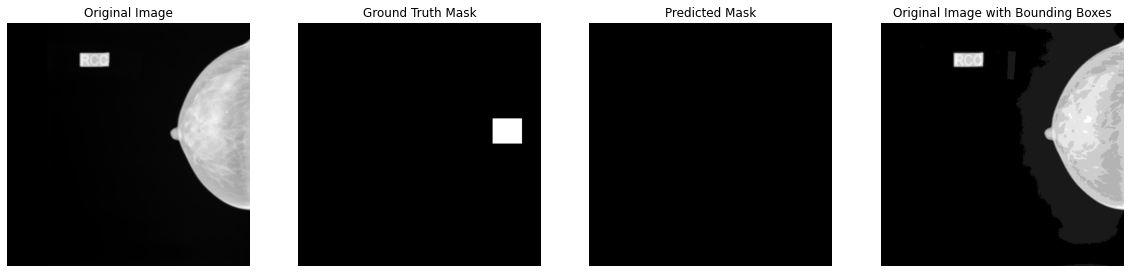

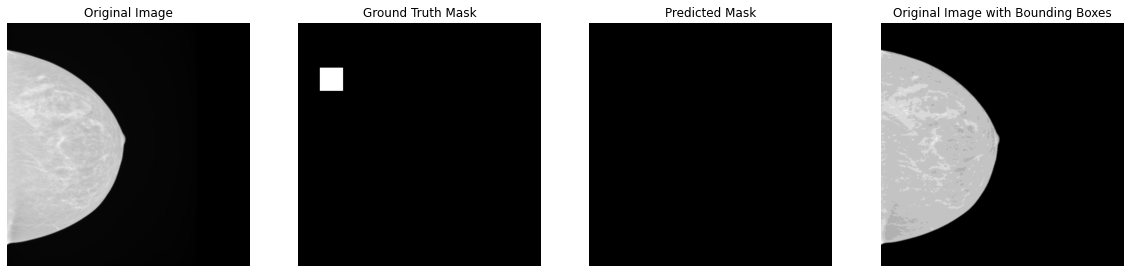

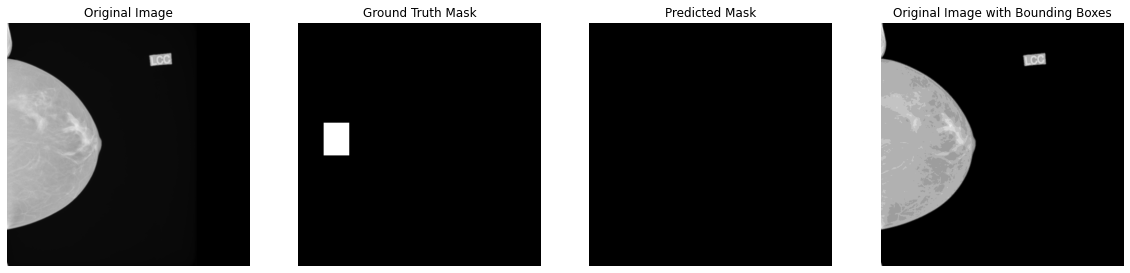

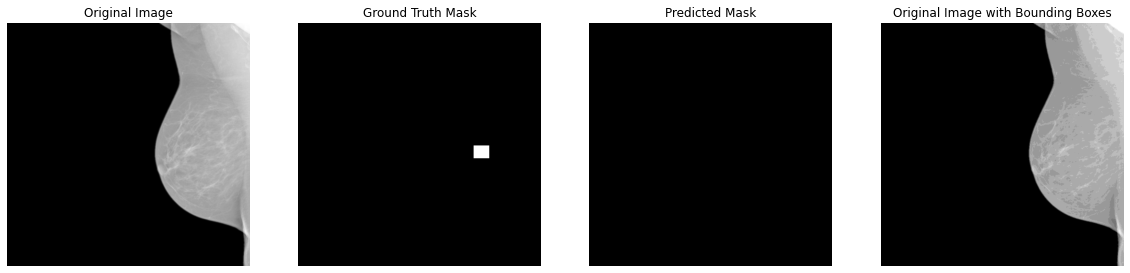

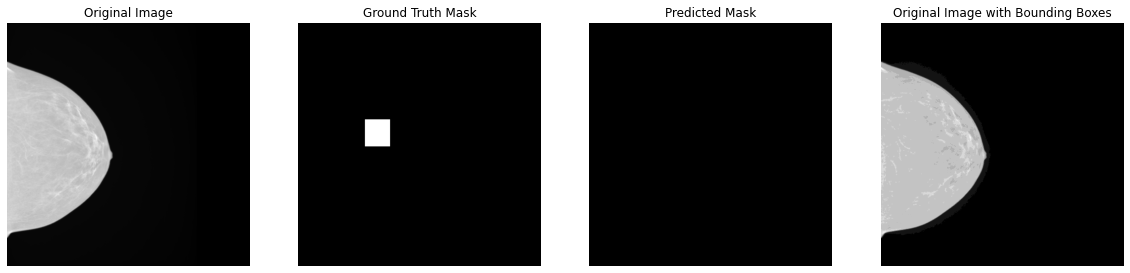

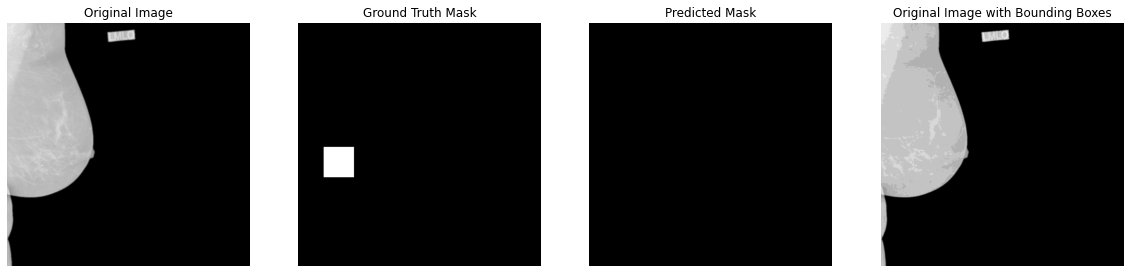

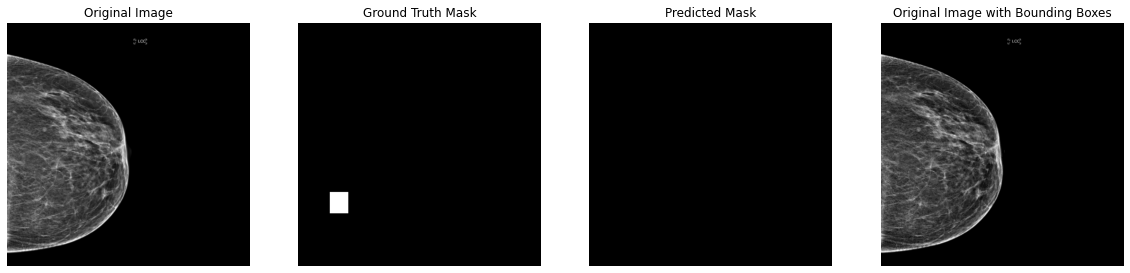

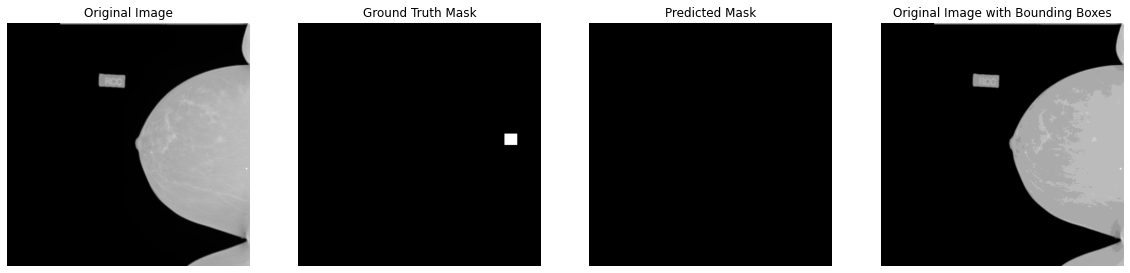

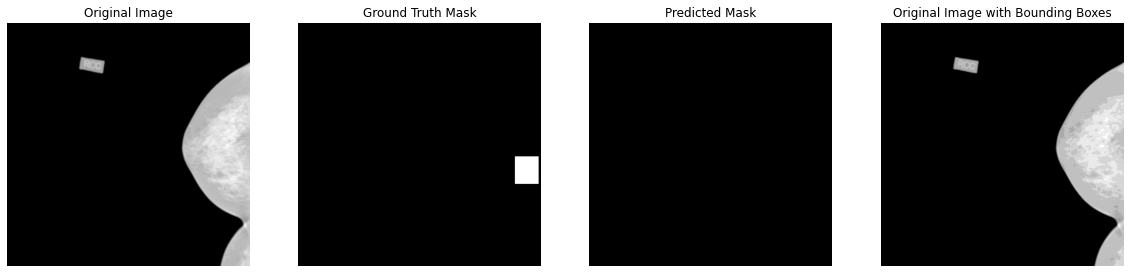

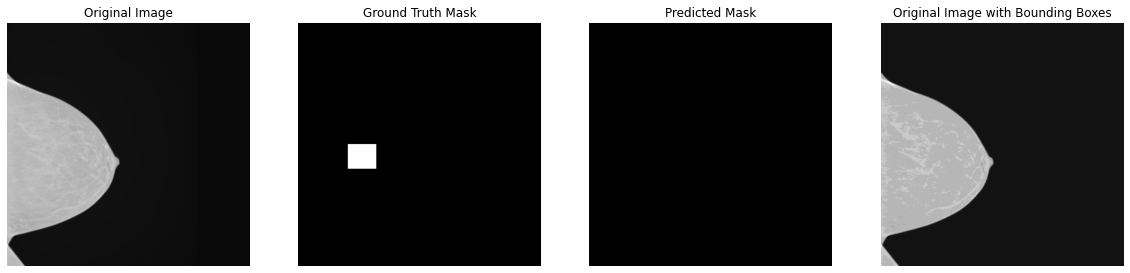

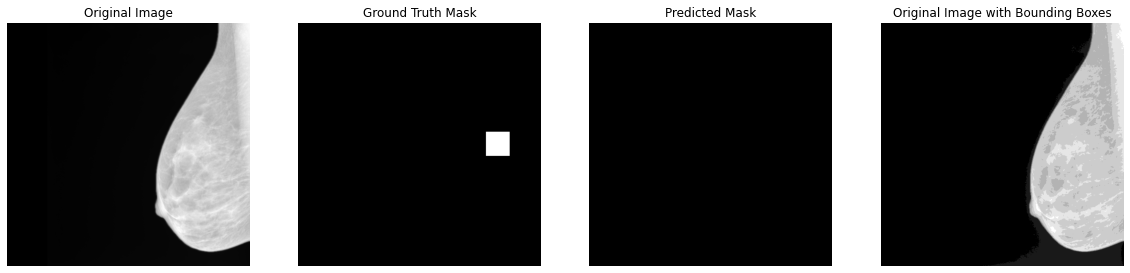

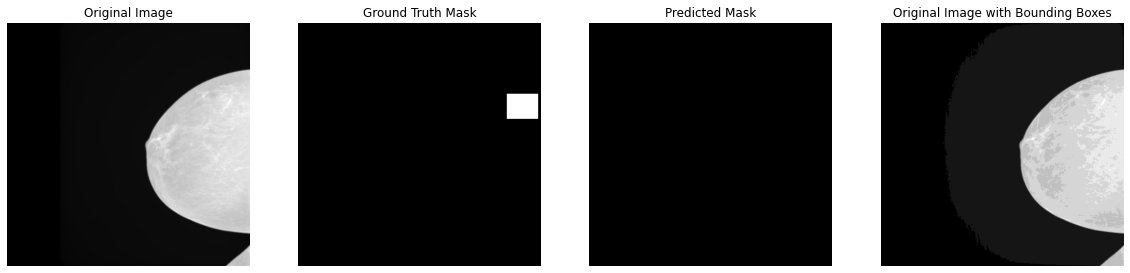

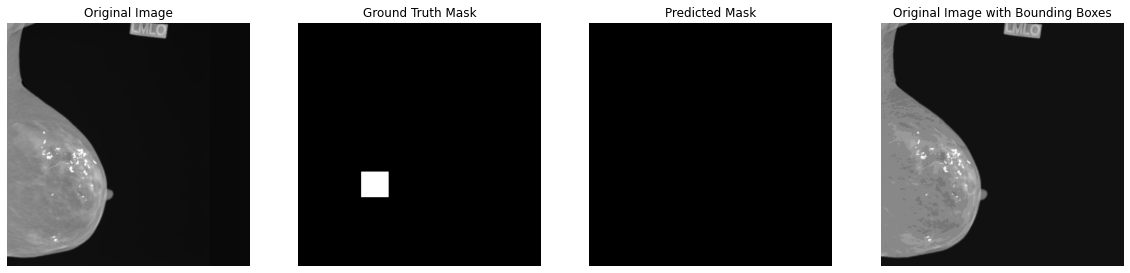

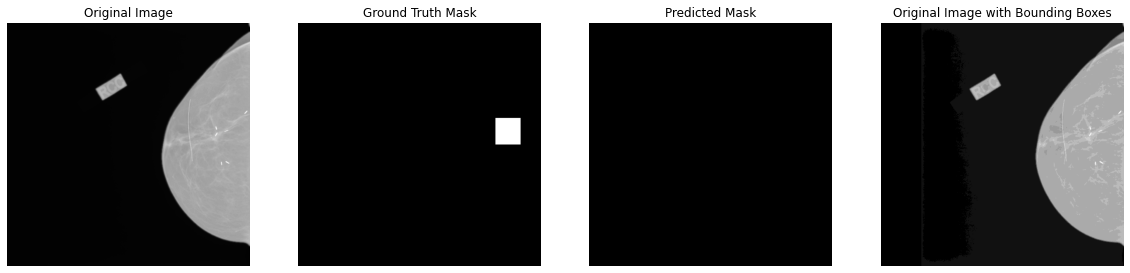

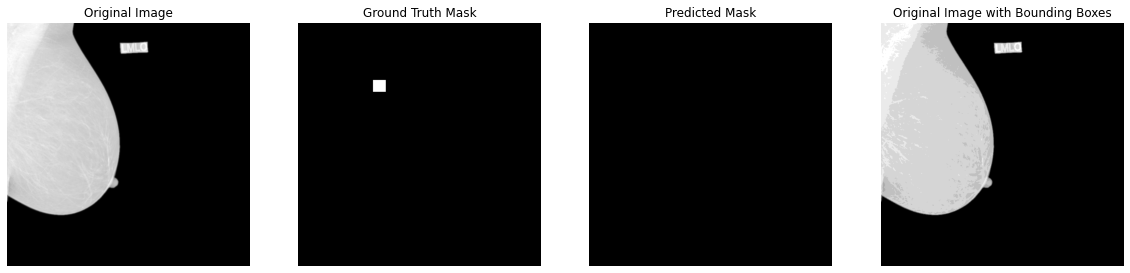

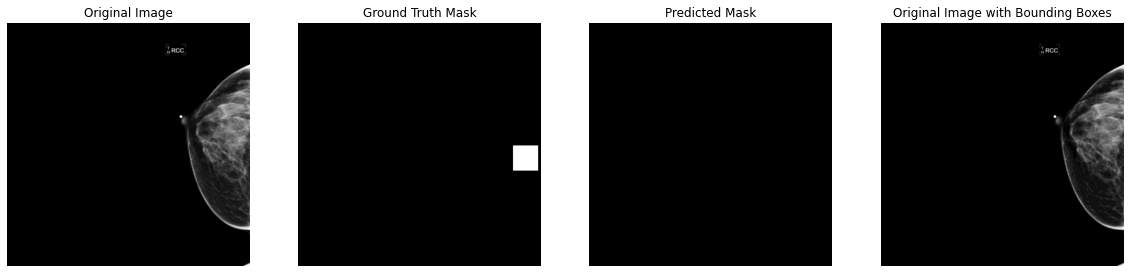

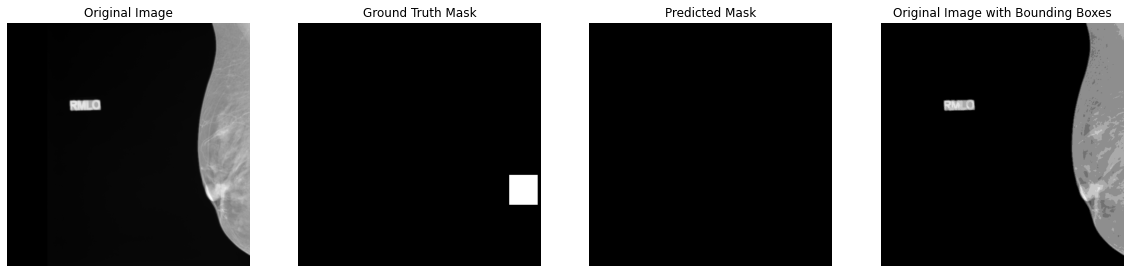

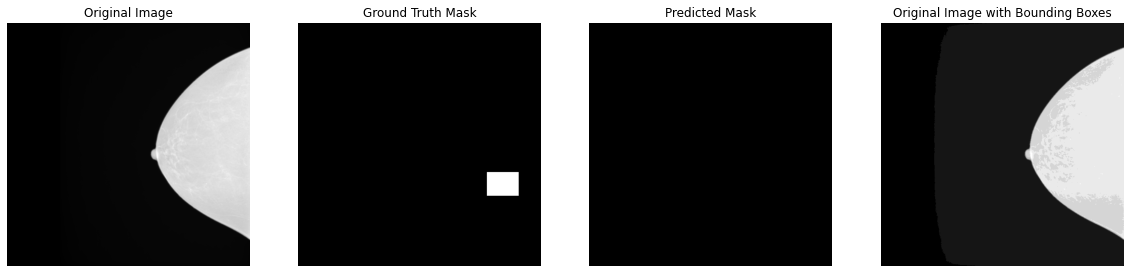

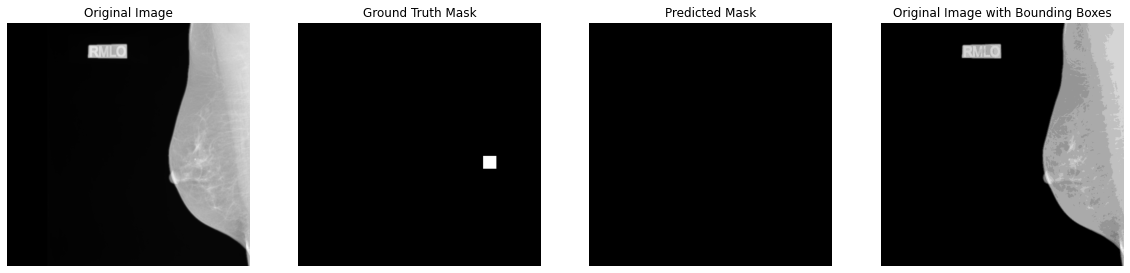

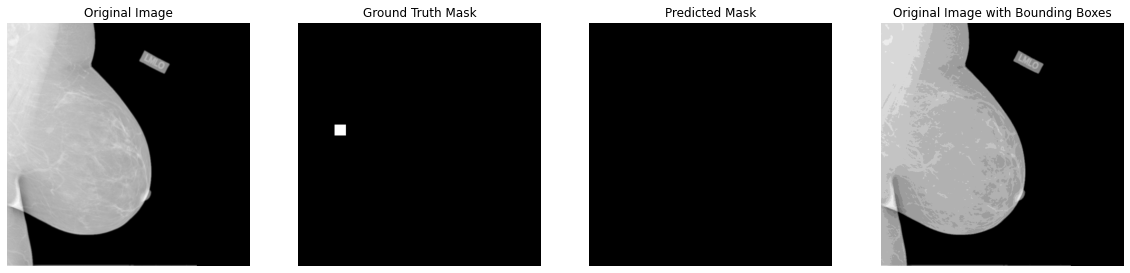

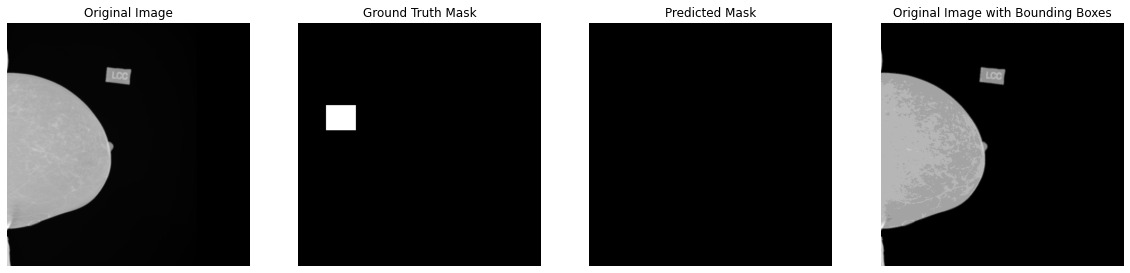

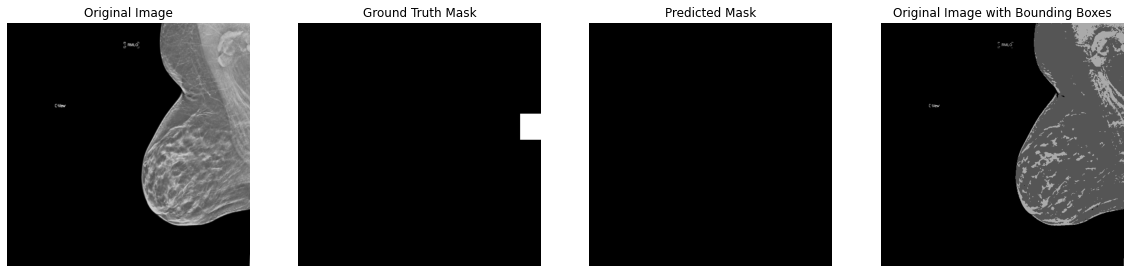

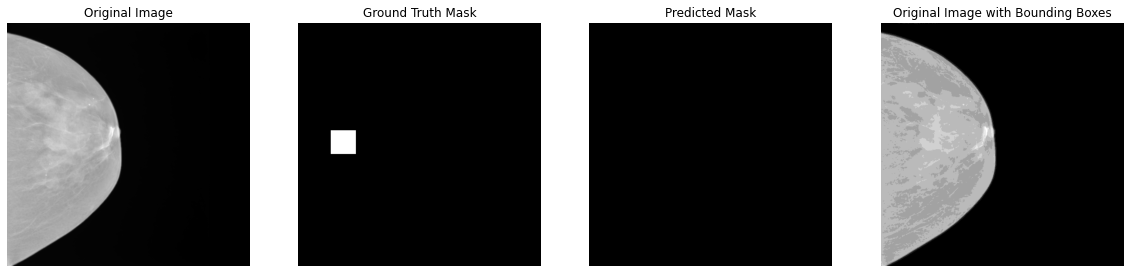

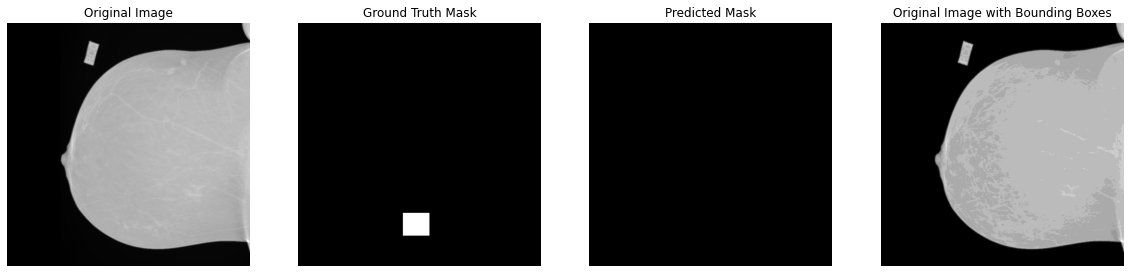

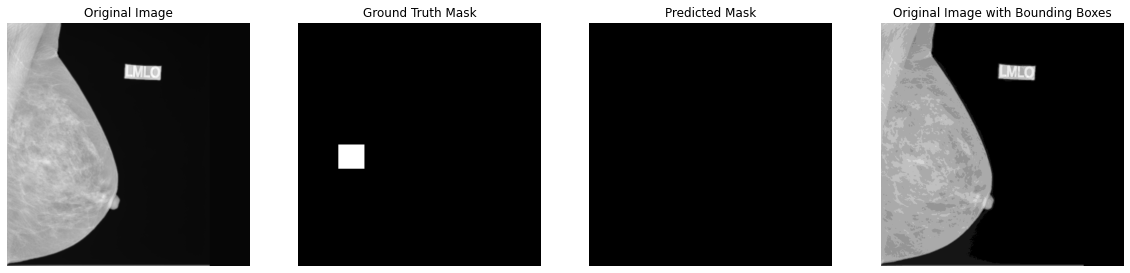

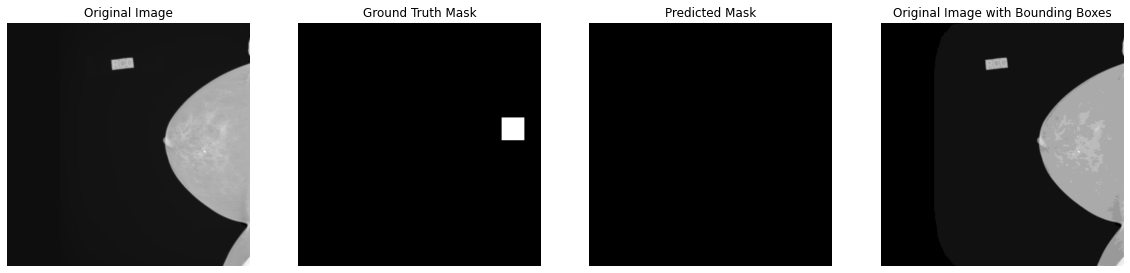

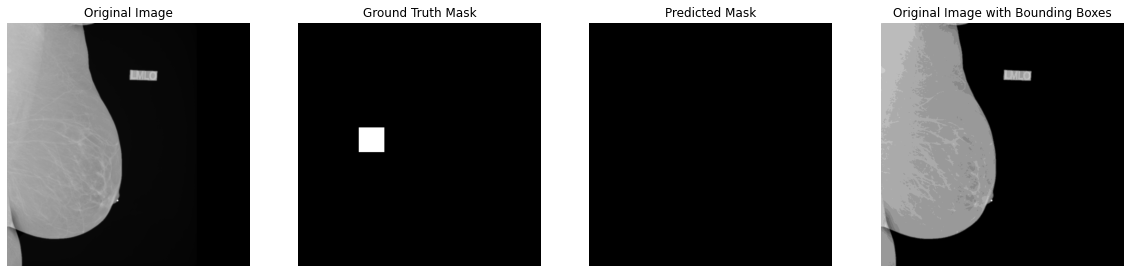

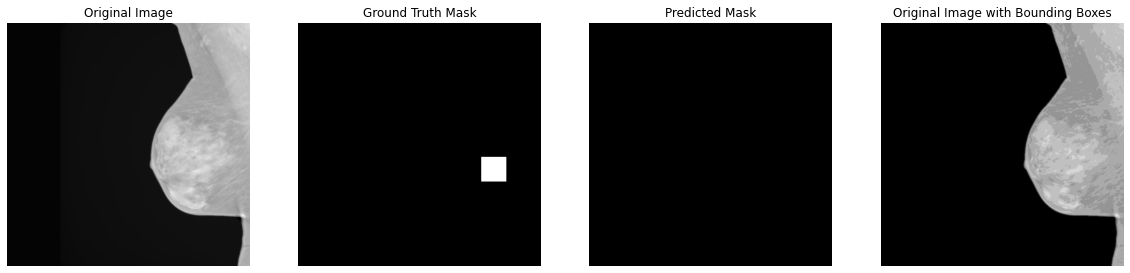

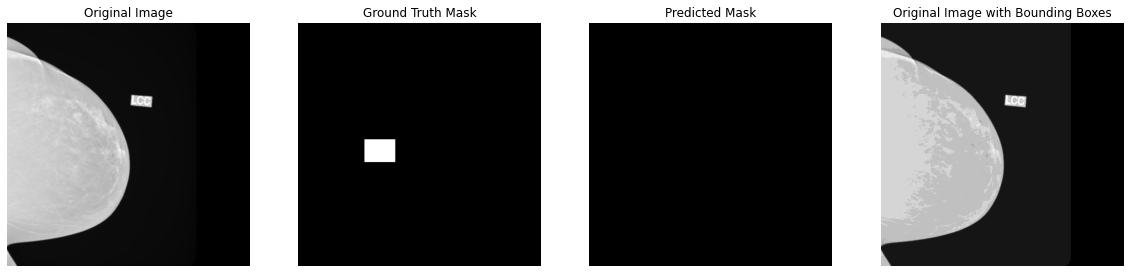

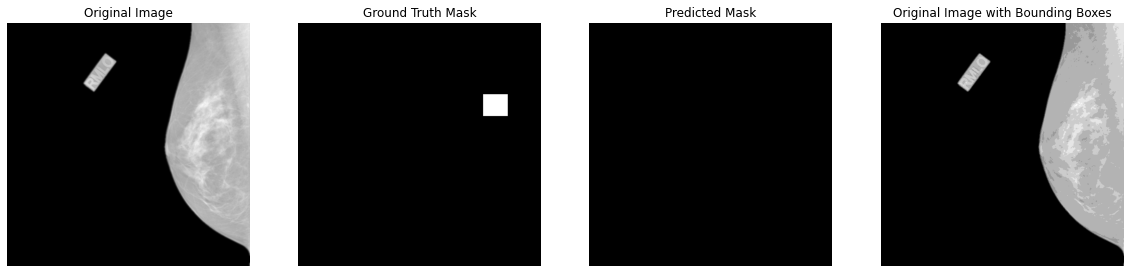

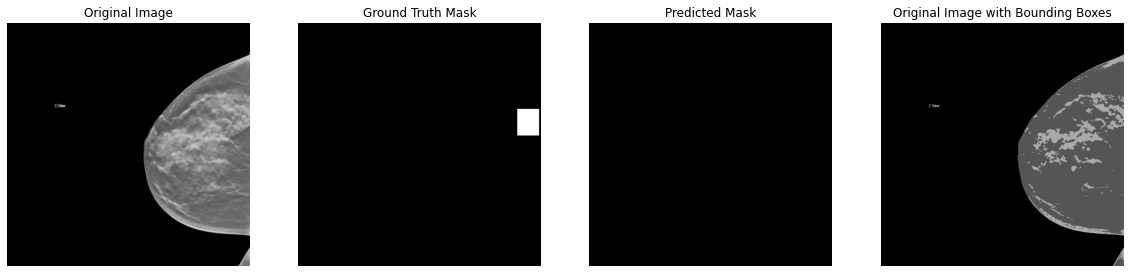

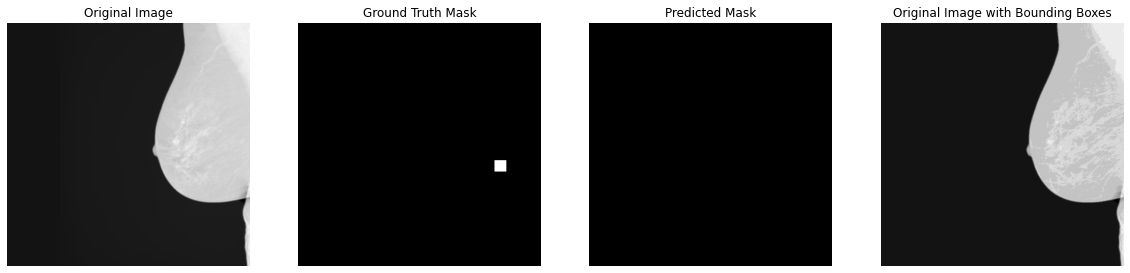

In [9]:
unet.visualize_predictions(
    test_image_folder, test_mask_folder, num_images=5, threshold=0.5
)

In [10]:
unet.evaluate(test_image_folder, test_mask_folder)

  0%|          | 0/63 [00:00<?, ?it/s]

62/62 [==============================] - 19s 298ms/step - loss: 0.0441 - accuracy: 0.9893 - precision: 0.0000e+00 - recall: 0.0000e+00 - f1_score: 0.0000e+00 - iou: 0.4947
Test Loss: 0.04409383237361908, Test Accuracy: 0.9893132448196411


In [11]:
predictions = unet.predict(test_image_folder)

Generating predictions...
image_folder:  /hpcstor6/scratch01/r/ryan.zurrin001/omama_2d/2d_512_small/test/images


  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [12]:
import os
import cv2
if not os.path.exists(prediction_save_path):
    os.makedirs(prediction_save_path)

for i, pred in enumerate(predictions):
    pred_image = (pred.squeeze() * 255).astype(np.uint8)  # Convert from float to uint8
    cv2.imwrite(os.path.join(prediction_save_path, f'prediction_{i}.png'), pred_image)

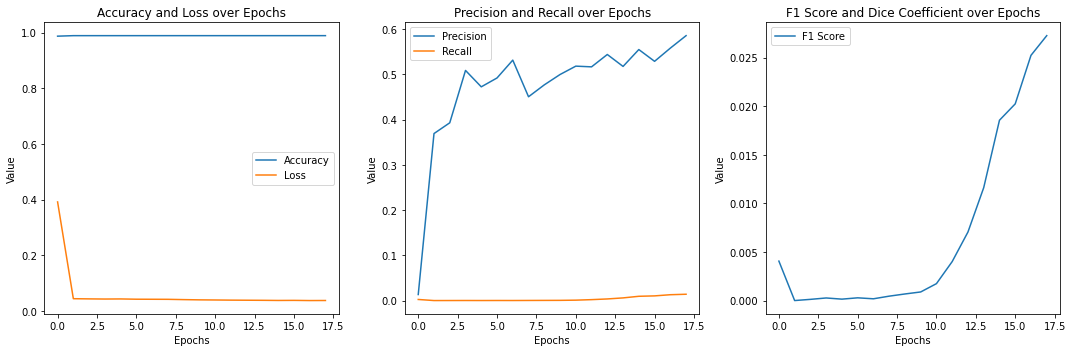

In [13]:
unet.plot_training_history()